In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

<h2>About Dataset</h2>
<p><a href='https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis'>Dataset</a> contains 4 csv files.</p>
    <ul>
        <li>Train-1542865627584.csv - This file contains Providers Id and whether provider is potential fraud or not.</li>
        <li>Train_Beneficiarydata-1542865627584.csv - This file contains basic details of beneficiary who have opted for medicare.</li>
        <li>Train_Inpatientdata-1542865627584.csv - This file contains details of claims filled for patient who are admitted to hospitals.</li>
        <li>Train_Outpatientdata-1542865627584.csv - This file contains details of claims filled for patient who are not admitted to hospitals.</li>
    </ul>

In [2]:
provider_df = pd.read_csv("Train-1542865627584.csv")
beneficiary_df = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
inpatient_df = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
outpatient_df = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

In [4]:
provider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [3]:
provider_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [5]:
# https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib
def label_function(val):
    return f'{val / 100 * len(provider_df):.0f}\n{val:.0f}%'

<AxesSubplot:ylabel='PotentialFraud'>

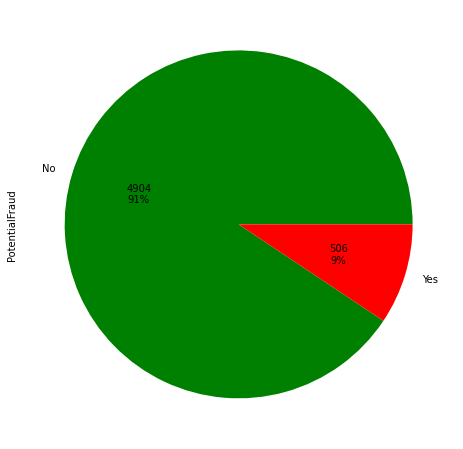

In [6]:
provider_df['PotentialFraud'].value_counts().plot(kind='pie', autopct=label_function,colors=['Green', 'Red', ], figsize=(8, 8))

<h3>Observations</h3>
Dataset is imbalance only 9% of total providers are fraud providers

In [7]:
inpatient_df = pd.read_csv("Train_Inpatientdata-1542865627584.csv")

In [8]:
inpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [7]:
inpatient_df.shape

(40474, 30)

We have total 40474 inpatient claims filed

In [8]:
inpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


<h3>Joining(left join) inpatient claim table and provider table to get details of fraud claims</h3> 

In [9]:
inpatient_provider = pd.merge(inpatient_df, provider_df, on="Provider", how="left")

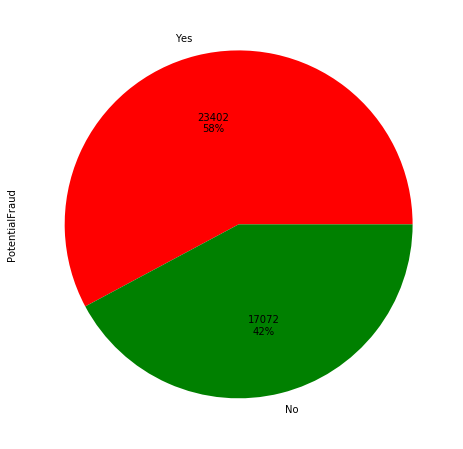

In [10]:
def label_function(val):
    return f'{val / 100 * len(inpatient_provider):.0f}\n{val:.0f}%'
inpatient_provider['PotentialFraud'].value_counts().plot(kind='pie', autopct=label_function,colors=['Red','Green' ], figsize=(8, 8))

<h3>Observation</h3>
There are more potential fraud claim than non fraud claims in Inpatient dataset.
Out of total inpatient claims 58% are fraudulent claims

In [9]:
outpatient_df = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

In [12]:
outpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [12]:
outpatient_df.shape

(517737, 27)

We have total 517737 outpatient claims filed

In [13]:
outpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


<h3>Joining(left join) outpatient claim table and provider table to get details of fraud claims</h3> 

In [14]:
outpatient_provider = pd.merge(outpatient_df, provider_df, on="Provider", how="left")

<AxesSubplot:ylabel='PotentialFraud'>

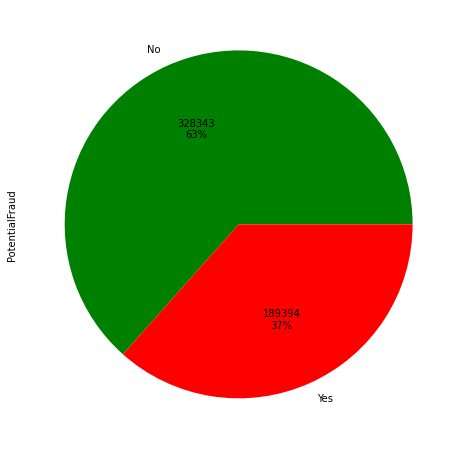

In [15]:
def label_function(val):
    return f'{val / 100 * len(outpatient_provider):.0f}\n{val:.0f}%'
outpatient_provider['PotentialFraud'].value_counts().plot(kind='pie', autopct=label_function,colors=['Green', 'Red' ], figsize=(8, 8))

<h3>Observation</h3>
In outpatient there is 37% are fraud claim filed.
There are less fraudulent claim 37% in outpatient compare to inpatient 57%

<h3>Money lost by U.S. government to fraud claims</h3> 

<h2>Outpatient</h2>

In [16]:
import seaborn as sns

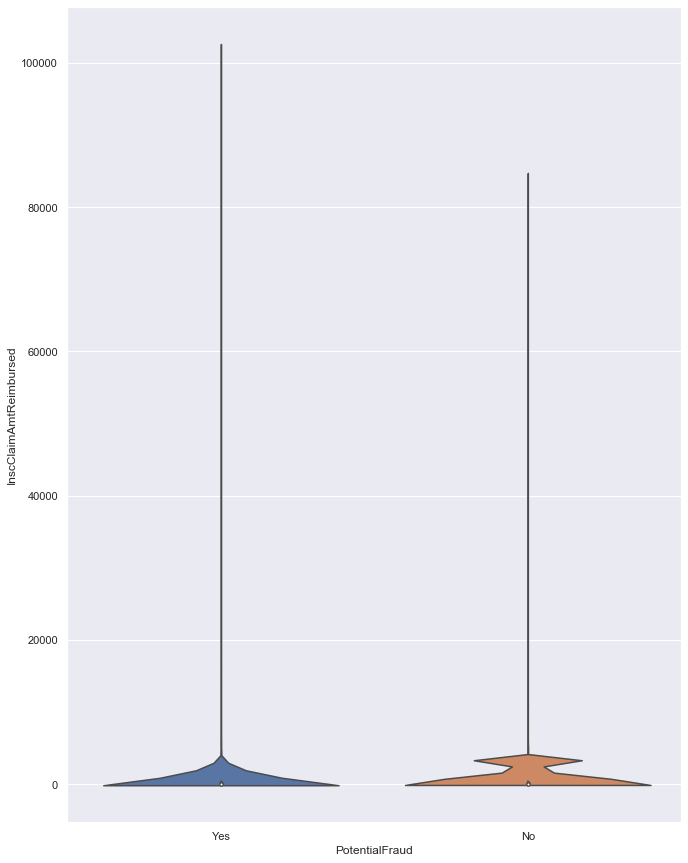

In [17]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11,15)})
ax = sns.violinplot(x="PotentialFraud", y="InscClaimAmtReimbursed", data=outpatient_provider)

We can see here that for non fraud claims there is no insurance claim amount is more than 85000$
<br>There is difference in distribution of fraud and non fraud claim insurance amount reimbursed.

In [16]:
outpatient_provider[outpatient_provider["PotentialFraud"] == "Yes"]["InscClaimAmtReimbursed"].sum() * 100 / outpatient_provider["InscClaimAmtReimbursed"].sum()

36.69074779157795

Percentage of money lost in outpatient fraud

In [17]:
outpatient_provider["InscClaimAmtReimbursed"].sum()

148246120

Total money reimbursed for outpatient

<h2>Inpatient</h2>

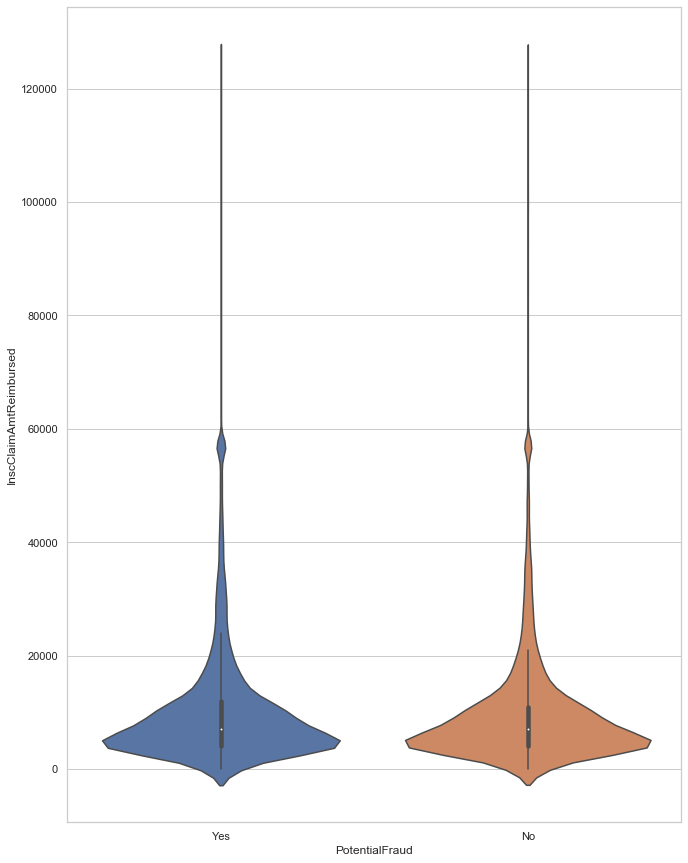

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="PotentialFraud", y="InscClaimAmtReimbursed", data=inpatient_provider)

For inpatient distribution for fraud and non fraud insurance amount reimbursed is almost same

In [21]:
inpatient_provider[inpatient_provider["PotentialFraud"] == "Yes"]["InscClaimAmtReimbursed"].sum() * 100 / inpatient_provider["InscClaimAmtReimbursed"].sum()

59.0963191453124

Percentage of money lost by company for inpatient fraud

In [22]:
 inpatient_provider["InscClaimAmtReimbursed"].sum()

408297020

Total money reimbursed for intpatient

<h3>Observations</h3>
Money lost in Inpatient claims from total reimbursement is 60 % which a very high amount.
<br>Money lost in Outpatient claims is 36% this is also an significant amount.
<br>Although the number of claims in inpatient is less but the money reimbursed is 8 times the money reimbursed for outpatient

In [23]:
len(inpatient_provider.groupby("Provider"))

2092

We have total 2092 unique provider in inpatient

In [24]:
len(outpatient_provider.groupby("Provider"))

5012

We have total 5012 unique provider in outpatient

<h3>Observations</h3>
Out of total 5410 Providers only 2092 Providers filed inpatient claim.
<br>Out of total 5410 Providers only 5012 Providers filed outpatient claim.

In [25]:
len(inpatient_provider[inpatient_provider["PotentialFraud"] == "Yes"].groupby('Provider'))

440

In [26]:
len(outpatient_provider[outpatient_provider["PotentialFraud"] == "Yes"].groupby('Provider'))

462

<h3>Observations</h3>
Out of total 506 potential fraud providers 440 are involved in inpatient fraud.
<br>Out of total 506 potential fraud providers 462 are involved in outpatient fraud.

In [27]:
all_provider = set(provider_df['Provider'].values)

In [28]:
all_claim_provider = set(inpatient_provider.groupby("Provider").size().index).union(set(outpatient_provider.groupby("Provider").size().index))

In [29]:
len(all_provider.intersection(all_claim_provider))

5410

<h3>Observations</h3>
There are no provider who has not filed any claim

<h3>Admitted for days</h3>

In [30]:
inpatient_provider[['AdmissionDt','DischargeDt']] = inpatient_provider[['AdmissionDt','DischargeDt']].apply(pd.to_datetime)

In [31]:
# added one because for beneficiary how are admitted and discharge on same day will have 0 admitted days
inpatient_provider['AdmitDays'] = (inpatient_provider['DischargeDt'] - inpatient_provider['AdmissionDt']).dt.days + 1

In [32]:
inpatient_provider.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,AdmitDays
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,4
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No,9
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No,18


In [33]:
inpatient_provider['AdmitDays'].describe()

count    40474.000000
mean         6.665168
std          5.638538
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         36.000000
Name: AdmitDays, dtype: float64

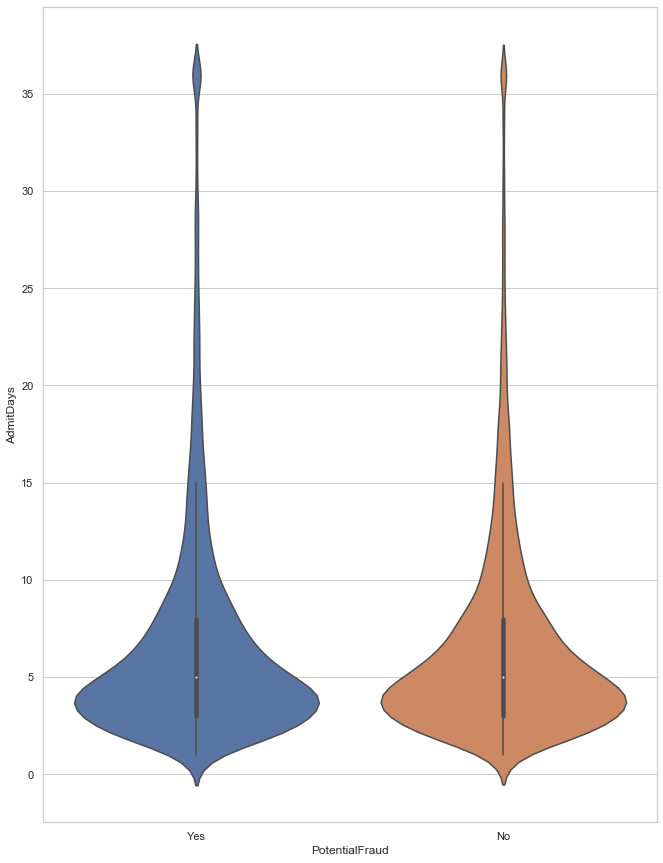

In [34]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="PotentialFraud", y="AdmitDays", data=inpatient_provider)

<h3>Obsevation</h3>
Distribution of admitted days is same for both fraud and non fraud claims.
<br>Most of the beneficiary are admitted for 3-5 days.

In [35]:
inpatient_provider[['ClaimStartDt','ClaimEndDt']] = inpatient_provider[['ClaimStartDt','ClaimEndDt']].apply(pd.to_datetime)

In [36]:
inpatient_provider[inpatient_provider["ClaimEndDt"] > inpatient_provider["DischargeDt"]]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,AdmitDays
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Yes,7
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,25000,NaN,5369.0,NaN,NaN,NaN,NaN,NaN,Yes,10
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,4439,27801,3712.0,NaN,NaN,NaN,NaN,NaN,Yes,6
9094,BENE44545,CLM82209,2009-01-18,2009-01-27,PRV52843,14000,PHY365072,NaN,NaN,2009-01-18,...,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,8
9974,BENE47786,CLM82208,2009-05-27,2009-06-04,PRV52828,14000,PHY391167,NaN,NaN,2009-05-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6
17060,BENE73681,CLM82213,2009-02-10,2009-02-21,PRV54354,11000,PHY397703,NaN,PHY390453,2009-02-10,...,V4502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,9
18267,BENE78133,CLM82210,2009-01-02,2009-01-05,PRV53461,20000,PHY331754,PHY426843,NaN,2009-01-02,...,NaN,NaN,387.0,NaN,NaN,NaN,NaN,NaN,Yes,2
21298,BENE88968,CLM82205,2009-02-23,2009-02-28,PRV52045,24000,PHY339550,PHY359571,NaN,2009-02-23,...,4275,NaN,54.0,NaN,NaN,NaN,NaN,NaN,Yes,3
26395,BENE107828,CLM82216,2009-01-01,2009-01-22,PRV55018,19000,PHY364322,PHY320450,NaN,2009-01-01,...,2720,486,5123.0,7850.0,NaN,NaN,NaN,NaN,Yes,19
27053,BENE110116,CLM82217,2009-02-09,2009-03-17,PRV56268,20000,PHY400645,PHY408610,NaN,2009-02-09,...,73007,NaN,3950.0,NaN,NaN,NaN,NaN,NaN,Yes,36


In [37]:
len(inpatient_provider[inpatient_provider["ClaimEndDt"] > inpatient_provider["DischargeDt"]].groupby('Provider'))

17

<h3>Observations</h3>
<b>All claim whose Claim end date is greater than discharge date are fraudulent claims.
<br>All providers are also unique.<b>

In [38]:
inpatient_provider[(inpatient_provider["ClaimStartDt"] != inpatient_provider["AdmissionDt"])]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,AdmitDays
2163,BENE18587,CLM37486,2009-02-10,2009-02-11,PRV52020,3000,PHY359519,NaN,NaN,2009-02-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,4
4422,BENE26849,CLM70032,2009-10-02,2009-10-07,PRV56647,12000,PHY332134,NaN,NaN,2009-09-29,...,42833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,9
5400,BENE30503,CLM67400,2009-09-12,2009-09-14,PRV54228,3000,PHY364179,NaN,NaN,2009-09-09,...,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,6
5647,BENE31388,CLM40738,2009-03-07,2009-03-08,PRV51490,16000,PHY325912,PHY325912,NaN,2009-03-02,...,73017,40390,8411.0,NaN,NaN,NaN,NaN,NaN,Yes,7
5869,BENE32209,CLM58624,2009-07-10,2009-07-17,PRV51249,6000,PHY326642,PHY383790,PHY372651,2009-07-06,...,NaN,NaN,9921.0,NaN,NaN,NaN,NaN,NaN,Yes,12
7828,BENE39685,CLM47198,2009-04-20,2009-04-22,PRV53705,600,PHY416391,PHY356670,NaN,2009-04-16,...,2724,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,No,7
7869,BENE39802,CLM73187,2009-11-01,2009-11-05,PRV52100,3000,PHY366670,PHY348391,NaN,2009-10-24,...,40390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,13
9051,BENE44335,CLM76442,2009-11-26,2009-11-27,PRV56259,10000,PHY397137,NaN,NaN,2009-11-18,...,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,10
9215,BENE45010,CLM32686,2009-01-11,2009-01-23,PRV56778,24000,PHY418898,PHY392068,NaN,2009-01-06,...,78959,9974,5459.0,5119.0,NaN,NaN,NaN,NaN,No,18
11103,BENE51932,CLM44148,2009-03-28,2009-03-29,PRV51282,4000,PHY323106,NaN,NaN,2009-03-26,...,25000,70715,NaN,NaN,NaN,NaN,NaN,NaN,No,4


In [39]:
inpatient_provider[(inpatient_provider["ClaimStartDt"] != inpatient_provider["AdmissionDt"])][inpatient_provider["PotentialFraud"]=="Yes"].shape

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(17, 32)

<h3>Observations</h3>
Out of 32 values where ClaimStartDt is not equal to AdmissionDt 17 are fraud claims

<h3> Inpatient Diagnosis code Analysis

Combining all the Diagnosis code used

In [40]:
inpatient_diagnosis_code = pd.DataFrame(np.vstack([inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_1","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_2","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_3","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_4","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_5","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_6","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_7","PotentialFraud"]],  inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_8","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_9","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_10","PotentialFraud"]]]), columns=["ClaimID","Provider","ClmDiagnosisCode","PotentialFraud"])

In [41]:
inpatient_diagnosis_code.head()

,ClaimID,Provider,ClmDiagnosisCode,PotentialFraud
0,CLM46614,PRV55912,1970,Yes
1,CLM66048,PRV55907,6186,No
2,CLM68358,PRV56046,29623,No
3,CLM38412,PRV52405,43491,No
4,CLM63689,PRV56614,042,No


Droping all the row with no diagnosis code

In [42]:
inpatient_diagnosis_code = inpatient_diagnosis_code.dropna()

In [43]:
inpatient_diagnosis_code['ClmDiagnosisCode'] = 'D' + inpatient_diagnosis_code['ClmDiagnosisCode'].astype(str)

In [44]:
inpatient_diagnosis_code['ClmDiagnosisCode'].describe()

count     327328
unique      4716
top        D4019
freq       14153
Name: ClmDiagnosisCode, dtype: object

In [45]:
inpatient_diagnosis_code.shape

(327328, 4)

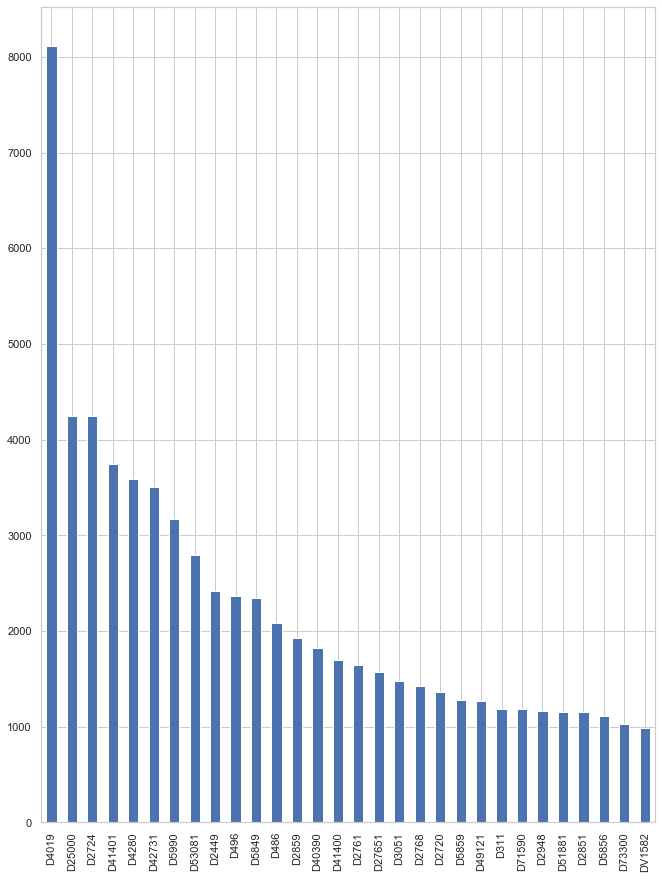

In [46]:
inpatient_diagnosis_code[inpatient_diagnosis_code["PotentialFraud"] == "Yes"]["ClmDiagnosisCode"].value_counts()[:30].plot(kind='bar')

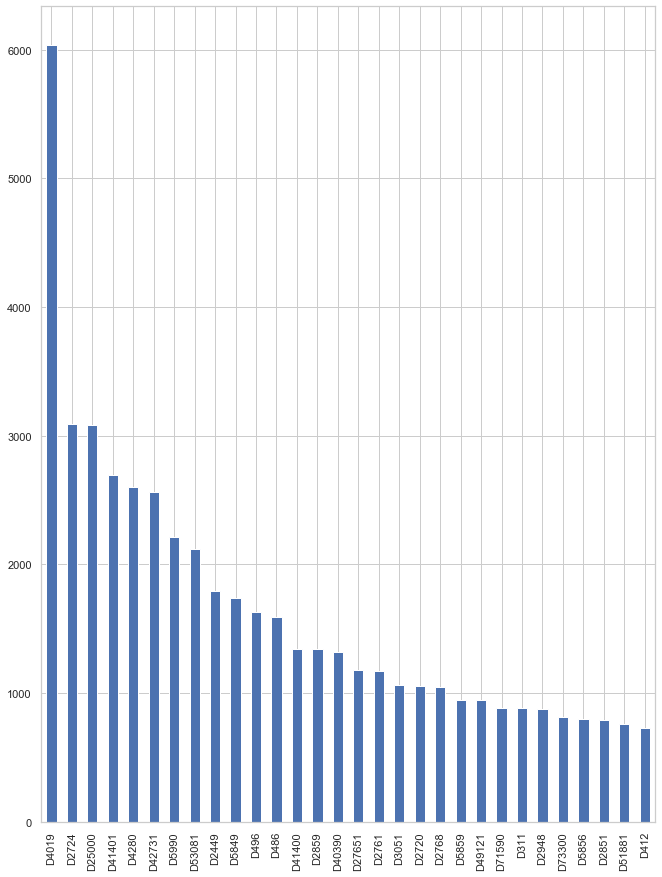

In [47]:
inpatient_diagnosis_code[inpatient_diagnosis_code["PotentialFraud"] == "No"]["ClmDiagnosisCode"].value_counts()[:30].plot(kind='bar')

Listing Diagnosis which are only used for fraud claims

In [48]:
fraud_claim_code = set(inpatient_diagnosis_code[inpatient_diagnosis_code["PotentialFraud"] == "Yes"]["ClmDiagnosisCode"].value_counts().index)
non_fraud_claim_code = set(inpatient_diagnosis_code[inpatient_diagnosis_code["PotentialFraud"] == "No"]["ClmDiagnosisCode"].value_counts().index)
print(fraud_claim_code - non_fraud_claim_code)

{'DV1503', 'D981', 'D60020', 'D30422', 'D81610', 'D5552', 'D64663', 'D64903', 'D8440', 'D72660', 'D55093', 'D94438', 'D34461', 'D7398', 'D73622', 'D9949', 'D53220', 'D7570', 'D64973', 'D66411', 'D7816', 'D22801', 'D4551', 'D71693', 'D3643', 'D44283', 'D2970', 'D71681', 'D505', 'D71958', 'D325', 'D64293', 'D8419', 'D47402', 'D94526', 'D3438', 'D5298', 'D73023', 'DE9589', 'D4542', 'D2154', 'D1917', 'D30759', 'D32701', 'D3588', 'D71885', 'D75670', 'D2180', 'D41082', 'DV6542', 'D06641', 'D86320', 'D85306', 'D29645', 'D64833', 'DV629', 'D82110', 'D87362', 'D9249', 'D36812', 'DE8150', 'D6018', 'D2909', 'DV1851', 'D0993', 'D74760', 'D47826', 'D01890', 'D80605', 'D73712', 'DE8171', 'D74721', 'D30392', 'D30151', 'D8441', 'D5582', 'D5836', 'D80022', 'DV812', 'D86221', 'D71930', 'DV549', 'D2702', 'DE9805', 'D33812', 'D74681', 'D73670', 'D65941', 'D63411', 'D7488', 'D8430', 'DE9441', 'D1401', 'D8719', 'D3344', 'D78724', 'DE8580', 'D09489', 'D83204', 'D65843', 'D5929', 'D38619', 'DV144', 'D32721', 

Counting total Diagnosis used for fraud claim only

In [49]:
len(fraud_claim_code - non_fraud_claim_code)

925

Counting number claims where only fraud diagnosis code is used

In [50]:
len(inpatient_diagnosis_code[inpatient_diagnosis_code['ClmDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("ClaimID"))

1327

Counting number of provider who uses fraud diagnosis code

In [51]:
len(inpatient_diagnosis_code[inpatient_diagnosis_code['ClmDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby('Provider'))

333

Percentage of money lost using only fraud diagnosis code

In [52]:
inpatient_provider[inpatient_provider["ClaimID"].isin(inpatient_diagnosis_code[inpatient_diagnosis_code['ClmDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / inpatient_provider["InscClaimAmtReimbursed"].sum()

3.6162154698067597

<h3>Observations</h3>
Most of top Diagnosis code used for fraud claims are also used for non fraud claims.
<br>Out of total 4716 Diagnosis code 925 are only used for fraud claims but they are only used for 1327 claims.
<br>Out of 440 fraud providers 333 uses only fraud diagonsis code.
<br>3.61% of total inpatient reimbursement money is used by fraud diagnosis code.

<h3>Outpatient Diagnosis code Analysis</h3>

In [53]:
outpatient_diagnosis_code = pd.DataFrame(np.vstack([outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_1","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_2","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_3","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_4","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_5","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_6","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_7","PotentialFraud"]],  outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_8","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_9","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmDiagnosisCode_10","PotentialFraud"]]]), columns=["ClaimID","Provider","ClmDiagnosisCode","PotentialFraud"])

Droping all na row

In [54]:
outpatient_diagnosis_code = outpatient_diagnosis_code.dropna()

In [55]:
outpatient_diagnosis_code['ClmDiagnosisCode'] = 'D' + outpatient_diagnosis_code['ClmDiagnosisCode'].astype(str)

In [56]:
outpatient_diagnosis_code['ClmDiagnosisCode'].describe()

count     1353388
unique      10846
top         D4019
freq        62903
Name: ClmDiagnosisCode, dtype: object

In [57]:
outpatient_diagnosis_code.shape

(1353388, 4)

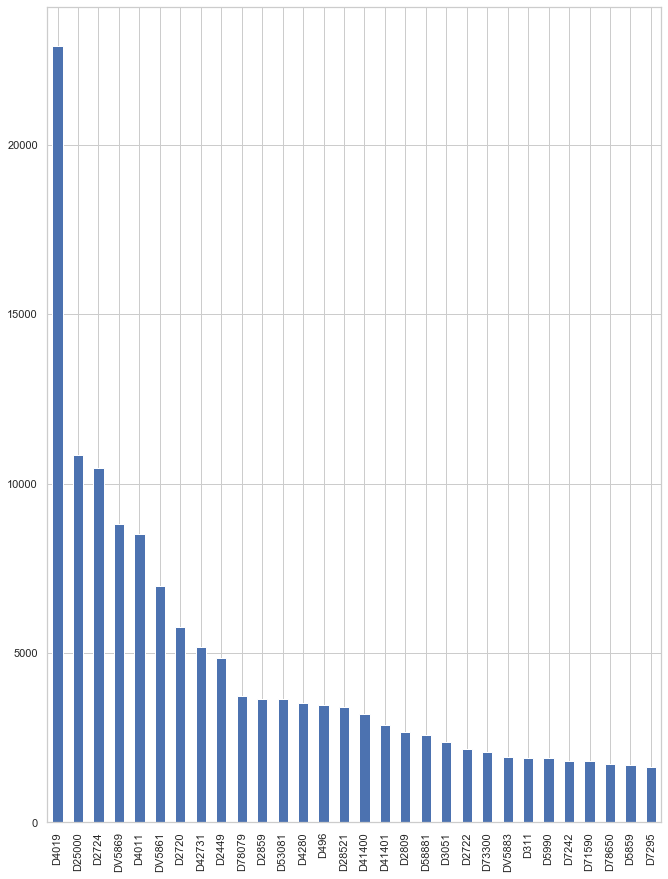

In [58]:
outpatient_diagnosis_code[outpatient_diagnosis_code["PotentialFraud"] == "Yes"]["ClmDiagnosisCode"].value_counts()[:30].plot(kind='bar')

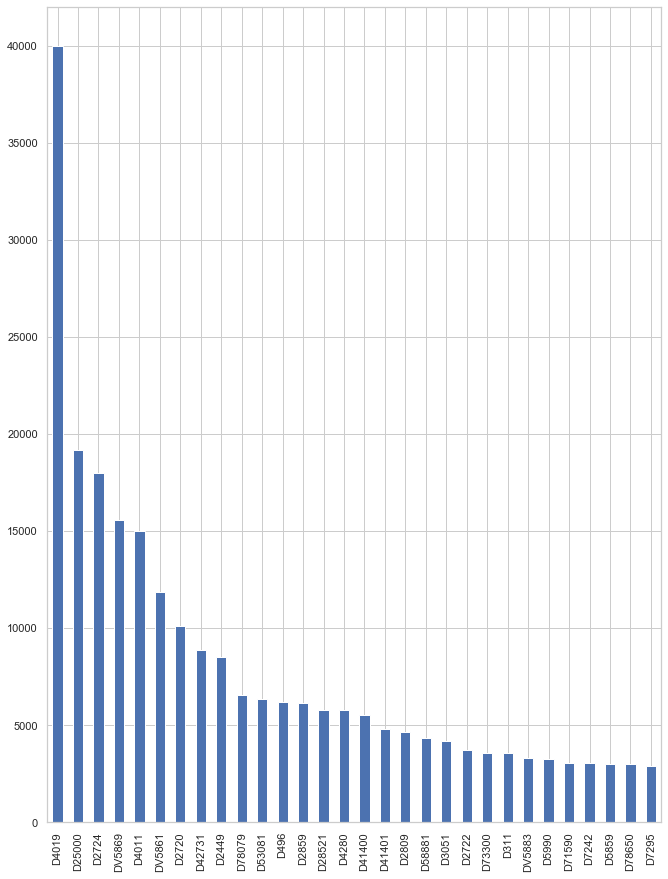

In [59]:
outpatient_diagnosis_code[outpatient_diagnosis_code["PotentialFraud"] == "No"]["ClmDiagnosisCode"].value_counts()[:30].plot(kind='bar')

In [60]:
fraud_claim_code = set(outpatient_diagnosis_code[outpatient_diagnosis_code["PotentialFraud"] == "Yes"]["ClmDiagnosisCode"].value_counts().index)
non_fraud_claim_code = set(outpatient_diagnosis_code[outpatient_diagnosis_code["PotentialFraud"] == "No"]["ClmDiagnosisCode"].value_counts().index)
print(fraud_claim_code - non_fraud_claim_code)

{'D80021', 'D80619', 'D85206', 'D85230', 'D7572', 'D09881', 'D80469', 'D36059', 'D74343', 'D80410', 'D0219', 'D64193', 'D37148', 'D64272', 'D80366', 'D94424', 'D94147', 'D85306', 'D64873', 'D09949', 'D9473', 'D71180', 'D80671', 'D04679', 'D74402', 'D0913', 'DE892', 'D09189', 'D76073', 'D20105', 'D36356', 'D0812', 'DE9583', 'D37820', 'D36833', 'D36340', 'DE8187', 'D63411', 'D71173', 'D80228', 'D80179', 'D0900', 'D7564', 'D90219', 'D67402', 'D80311', 'DE8529', 'D94873', 'D9695', 'D80145', 'D9464', 'D326', 'D64652', 'D3769', 'D94126', 'DV094', 'D64820', 'D9251', 'D37901', 'D36917', 'DV609', 'D80052', 'D80356', 'DE9654', 'D8674', 'D80454', 'D9761', 'D0859', 'D9713', 'D6280', 'D9786', 'D86514', 'D9788', 'D85135', 'D95210', 'D0631', 'D80063', 'D20192', 'D86809', 'D01642', 'D64912', 'D94255', 'D94157', 'D90211', 'DE8504', 'D80135', 'D64190', 'D7582', 'D37634', 'D86399', 'D30019', 'D36024', 'D64821', 'D67680', 'D36030', 'D94212', 'D85125', 'D75553', 'D53230', 'D36452', 'D83219', 'D80130', 'D09

Counting number of only fraud diagnosis code

In [61]:
len(fraud_claim_code - non_fraud_claim_code)

551

Counting claims where only fraud claim is used

In [62]:
len(outpatient_diagnosis_code[outpatient_diagnosis_code['ClmDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("ClaimID"))

731

Counting Provider who uses fraud diagnosis code

In [63]:
len(outpatient_diagnosis_code[outpatient_diagnosis_code['ClmDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby('Provider'))

216

Percentage of money lost to fraud diagnosis code

In [64]:
outpatient_provider[outpatient_provider["ClaimID"].isin(outpatient_diagnosis_code[outpatient_diagnosis_code['ClmDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / outpatient_provider["InscClaimAmtReimbursed"].sum()

0.1719640284683336

<h3>Observations</h3>
Most of top Diagnosis code used for fraud claims are also used for non fraud claims
<br>Out of total 10846 Diagnosis code 551 are only used for fraud claims but they are only used for 731 claims.
<br>Out of 462 fraud provider 216 uses fraud diagnosis code
<br>0.17% of total money reimbursed is used by fraud diagnosis code

<h3>Claim Admit Diagnosis Code</h3>

Inpatient

In [65]:
inpatient_provider['ClmAdmitDiagnosisCode'] = 'D' + inpatient_provider['ClmAdmitDiagnosisCode'].astype(str)

In [66]:
inpatient_provider['ClmAdmitDiagnosisCode'].describe()

count      40474
unique      1928
top       D78650
freq        1731
Name: ClmAdmitDiagnosisCode, dtype: object

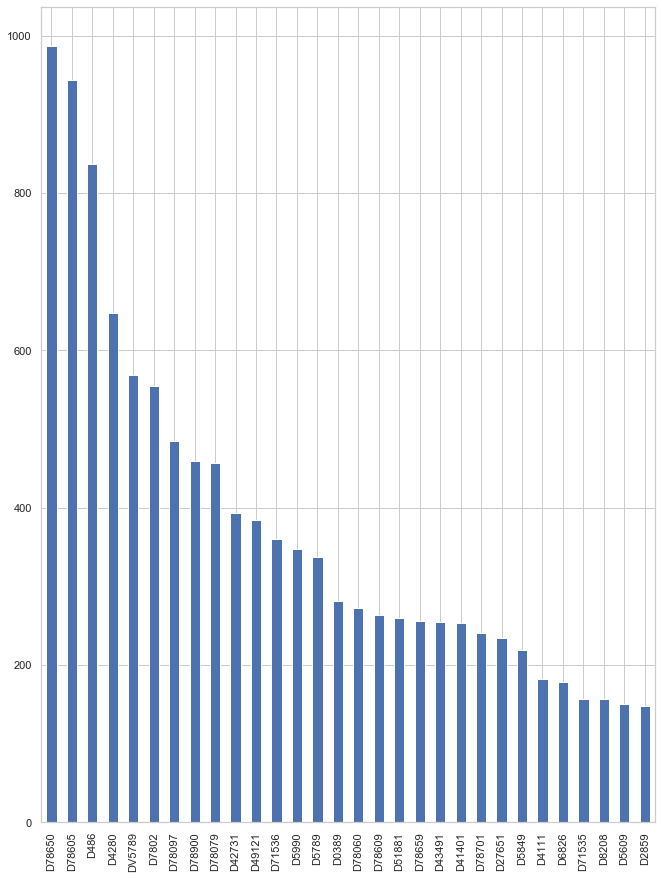

In [67]:
inpatient_provider[inpatient_provider["PotentialFraud"] == "Yes"]["ClmAdmitDiagnosisCode"].value_counts()[:30].plot(kind='bar')

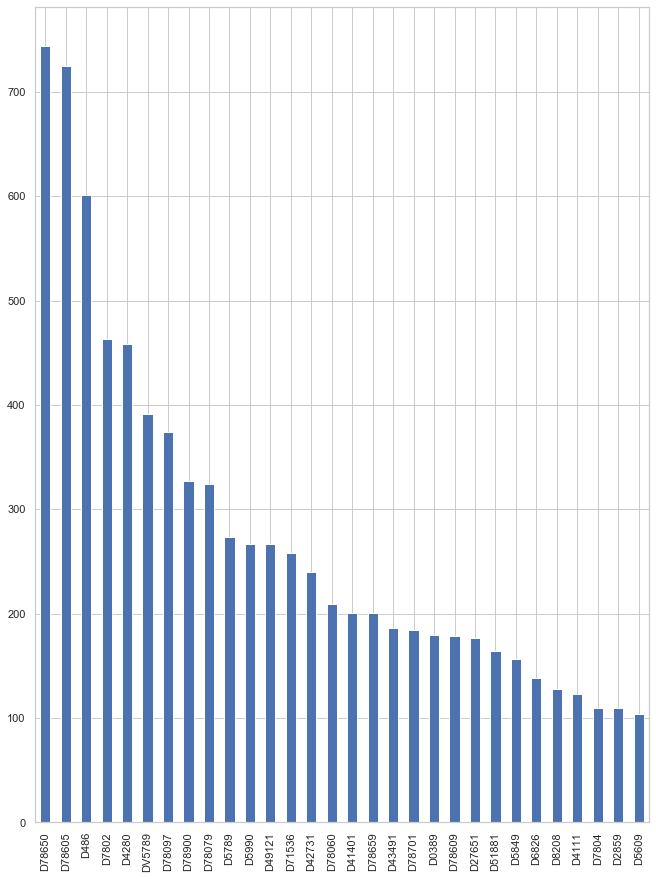

In [68]:
inpatient_provider[inpatient_provider["PotentialFraud"] == "No"]["ClmAdmitDiagnosisCode"].value_counts()[:30].plot(kind='bar')

In [69]:
fraud_claim_code = set(inpatient_provider[inpatient_provider["PotentialFraud"] == "Yes"]["ClmAdmitDiagnosisCode"].value_counts().index)
non_fraud_claim_code = set(inpatient_provider[inpatient_provider["PotentialFraud"] == "No"]["ClmAdmitDiagnosisCode"].value_counts().index)
print(fraud_claim_code - non_fraud_claim_code)

{'D8280', 'D1610', 'D80021', 'D5552', 'D1588', 'D1173', 'D72660', 'D85206', 'D86510', 'D99656', 'D7099', 'D92303', 'D5581', 'D81003', 'D2970', 'D37601', 'D74685', 'D2929', 'D2251', 'D73023', 'D6214', 'D3368', 'D53789', 'D1906', 'D4294', 'D7234', 'D58089', 'D71526', 'D8509', 'D1410', 'D1982', 'D1560', 'D72768', 'D69589', 'D8028', 'D7289', 'D2874', 'DV421', 'D78832', 'D9352', 'D5720', 'D0318', 'D73340', 'D88003', 'D5300', 'D80604', 'D20921', 'D25043', 'D1440', 'D05319', 'D1882', 'D24200', 'D34550', 'D8921', 'D1727', 'DV5489', 'D4555', 'D5929', 'D60889', 'D3109', 'D7350', 'D99671', 'D80326', 'D4838', 'DV717', 'D53011', 'D2528', 'D56962', 'D56721', 'D1552', 'D71956', 'D2724', 'D53190', 'D82129', 'D41072', 'D1528', 'D37430', 'D43320', 'D53019', 'D71897', 'D27652', 'D73689', 'D45821', 'D7273', 'D7904', 'D53440', 'D6850', 'D2367', 'D3330', 'DV714', 'D2903', 'D71902', 'D9899', 'D61809', 'D9879', 'D5966', 'D72610', 'D6944', 'D4263', 'D53084', 'D1963', 'D40301', 'D59582', 'D82001', 'D99590', 'D9

Counting only fraud admit diagnosis code

In [70]:
len(fraud_claim_code - non_fraud_claim_code)

543

Counting number of claims using fraud admit diagnosis code

In [71]:
len(inpatient_provider[inpatient_provider['ClmAdmitDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("ClaimID"))

827

Counting number of Provider using fraud admit diagnosis code

In [72]:
len(inpatient_provider[inpatient_provider['ClmAdmitDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("Provider"))

287

Percentage of total money lost in fraud admit code

In [73]:
inpatient_provider[inpatient_provider["ClaimID"].isin(inpatient_provider[inpatient_provider['ClmAdmitDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / inpatient_provider["InscClaimAmtReimbursed"].sum()

2.349319130470264

<h3>Observations</h3>
Top 30 admit diagnosis code are same for both fraud and non fraud claims.
<br>Out of total 1928 admit diagnosis code 543 are only used in fraud claims.
<br>Out of 440 fraud inpatient provider 287 uses fraud admit code.
<br>2.34% of total inpatient reimbursed money has fraud admit diagnosis code in it.

Outpatient

In [74]:
outpatient_provider['ClmAdmitDiagnosisCode'] = 'D' + outpatient_provider['ClmAdmitDiagnosisCode'].astype(str)

In [75]:
outpatient_provider['ClmAdmitDiagnosisCode'].describe()

count     517737
unique      3716
top         Dnan
freq      412312
Name: ClmAdmitDiagnosisCode, dtype: object

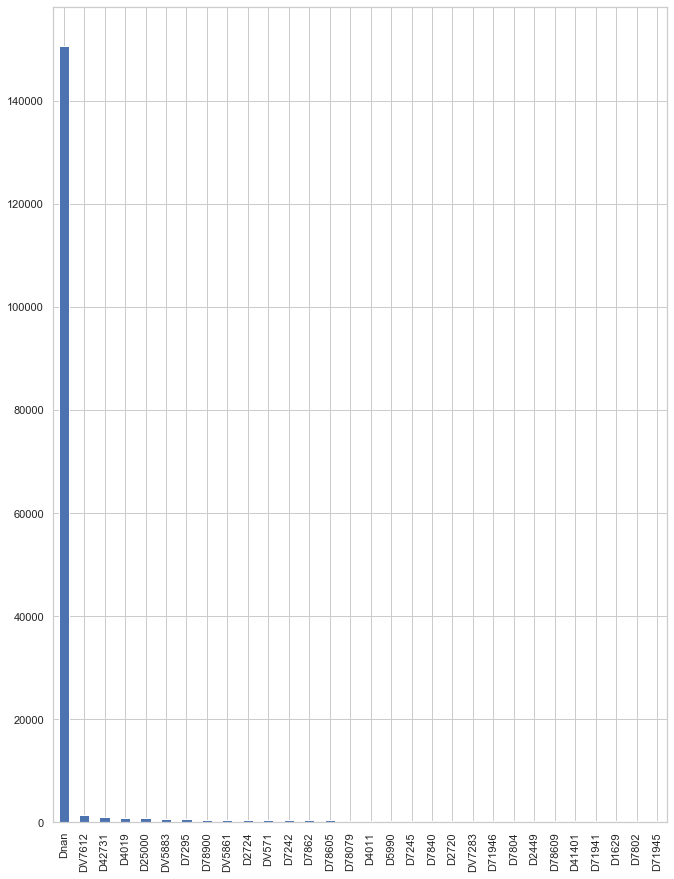

In [76]:
outpatient_provider[outpatient_provider["PotentialFraud"] == "Yes"]["ClmAdmitDiagnosisCode"].value_counts()[:30].plot(kind='bar')

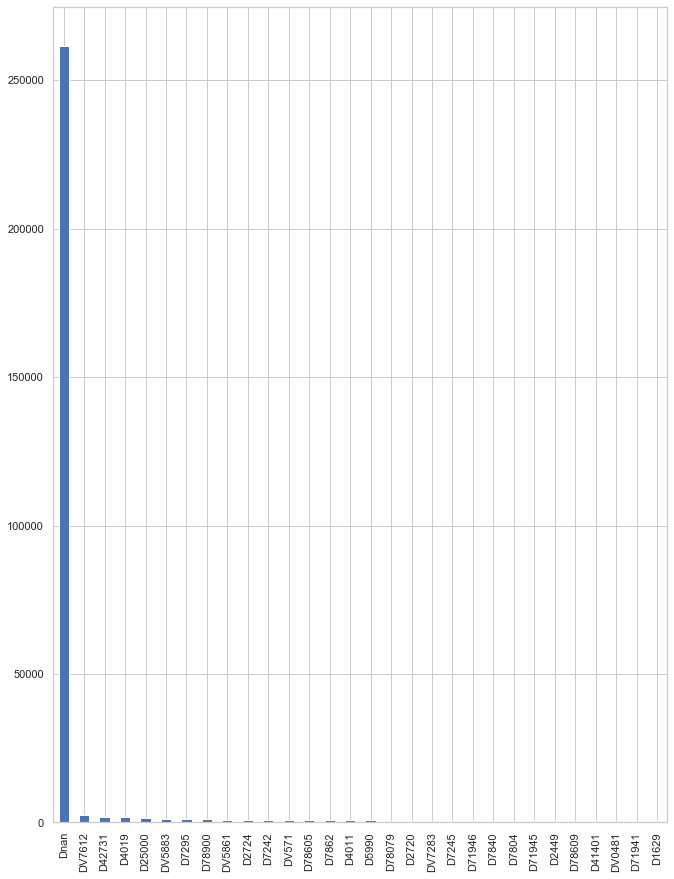

In [77]:
outpatient_provider[outpatient_provider["PotentialFraud"] == "No"]["ClmAdmitDiagnosisCode"].value_counts()[:30].plot(kind='bar')

Admit diagnosis code used only for fraud claims

In [78]:
fraud_claim_code = set(outpatient_provider[outpatient_provider["PotentialFraud"] == "Yes"]["ClmAdmitDiagnosisCode"].value_counts().index)
non_fraud_claim_code = set(outpatient_provider[outpatient_provider["PotentialFraud"] == "No"]["ClmAdmitDiagnosisCode"].value_counts().index)
print(fraud_claim_code - non_fraud_claim_code)

{'D70521', 'D83104', 'D60020', 'D33189', 'D81610', 'D27904', 'D64663', 'D41189', 'D7398', 'D11590', 'D37220', 'D84212', 'D37302', 'D52130', 'D8822', 'D88112', 'D03849', 'D99668', 'D37404', 'D7070', 'D3588', 'D4269', 'D73391', 'D80507', 'D87374', 'D25020', 'D1706', 'D3575', 'D34580', 'D71917', 'D72661', 'D38023', 'DE8889', 'D37941', 'D38905', 'D30272', 'D94531', 'D7290', 'D84849', 'D6073', 'D3229', 'D9352', 'D85300', 'DV532', 'D9962', 'D6920', 'D5300', 'D49311', 'D38913', 'D5194', 'DV6540', 'D4351', 'D03812', 'D78865', 'D7230', 'DV5841', 'D99671', 'D3594', 'D5948', 'D2528', 'D43320', 'D36531', 'D71952', 'D73329', 'D75452', 'D6850', 'D66714', 'D2230', 'D53641', 'DV161', 'D71894', 'D5811', 'D86121', 'DV748', 'D2903', 'D36201', 'D20580', 'D41022', 'D9551', 'D6944', 'DV425', 'D6224', 'D71518', 'D2124', 'D9165', 'D1713', 'DV1270', 'D36130', 'D36620', 'DV1081', 'D79504', 'D78961', 'D6248', 'D99660', 'D30929', 'D71593', 'D7861', 'D3343', 'D2325', 'D68601', 'D9089', 'D5724', 'D71513', 'D3819', 

Counting admit diagnosis code used  only for fraud claims

In [79]:
len(fraud_claim_code - non_fraud_claim_code)

534

Counting number of claims that has fraud admit diagnosis code

In [80]:
len(outpatient_provider[outpatient_provider['ClmAdmitDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("ClaimID"))

657

Counting number of provider that uses fraud admit diagnosis code

In [81]:
len(outpatient_provider[outpatient_provider['ClmAdmitDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("Provider"))

198

Percentage of total reimbursed money used by fraud amit code

In [82]:
outpatient_provider[outpatient_provider["ClaimID"].isin(outpatient_provider[outpatient_provider['ClmAdmitDiagnosisCode'].isin(list(fraud_claim_code - non_fraud_claim_code))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / outpatient_provider["InscClaimAmtReimbursed"].sum()

0.16117791143538868

<h3>Observations</h3>
Out of 517737 outpatient claims 412312 have no admit diagnosis code.
<br>Out of 3716 admit diagnosis code 534 are only used fraud.
<br>Only 657 claims use this fraud admit diagnosis code.
<br>Out of 462 outpatient fraud provider 198 uses this fraud admit diagnosis code.

<h3>Procedure Code Analysis</h3>

Inpatient

In [83]:
inpatient_procedure_code = pd.DataFrame(np.vstack([inpatient_provider[["ClaimID","Provider","ClmProcedureCode_1","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmProcedureCode_2","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmProcedureCode_3","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmProcedureCode_4","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmProcedureCode_5","PotentialFraud"]], inpatient_provider[["ClaimID","Provider","ClmProcedureCode_6","PotentialFraud"]]]), columns=["ClaimID","Provider","ClmProcedureCode","PotentialFraud"])
inpatient_procedure_code = inpatient_procedure_code.dropna()
inpatient_procedure_code['ClmProcedureCode'] = 'P' + inpatient_procedure_code['ClmProcedureCode'].astype(str)

In [84]:
inpatient_procedure_code['ClmProcedureCode'].describe()

count       29692
unique       1321
top       P4019.0
freq         1953
Name: ClmProcedureCode, dtype: object

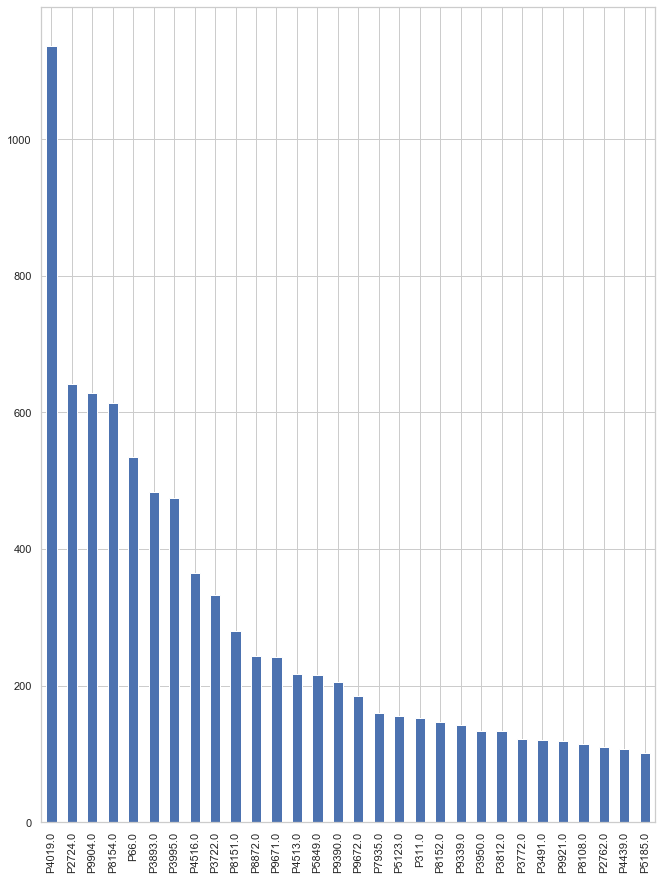

In [85]:
inpatient_procedure_code[inpatient_procedure_code["PotentialFraud"] == "Yes"]["ClmProcedureCode"].value_counts()[:30].plot(kind='bar')

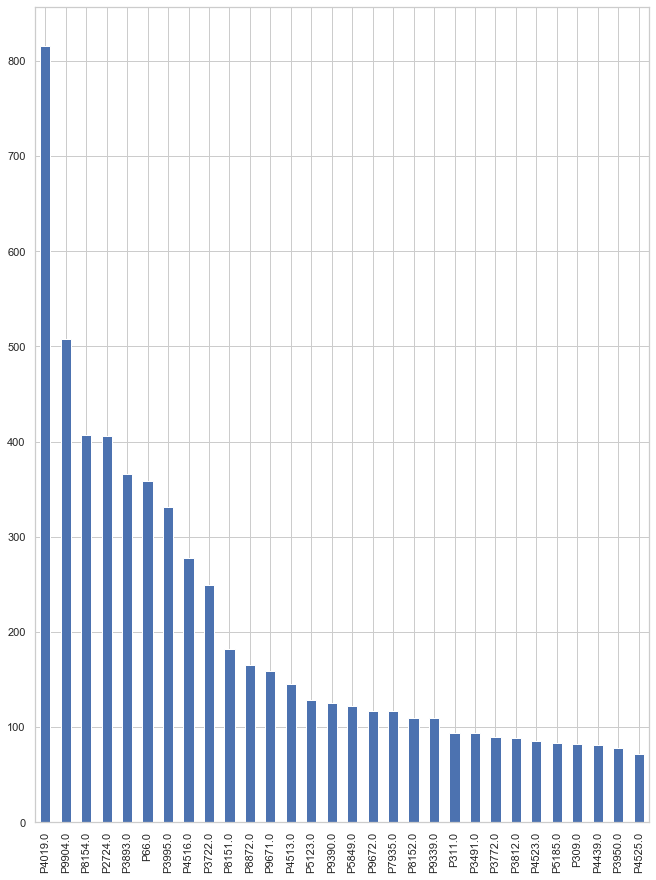

In [86]:
inpatient_procedure_code[inpatient_procedure_code["PotentialFraud"] == "No"]["ClmProcedureCode"].value_counts()[:30].plot(kind='bar')

Procedure code only used for fraud

In [87]:
fraud_claim_code = set(inpatient_procedure_code[inpatient_procedure_code["PotentialFraud"] == "Yes"]["ClmProcedureCode"].value_counts().index)
non_fraud_claim_code = set(inpatient_procedure_code[inpatient_procedure_code["PotentialFraud"] == "No"]["ClmProcedureCode"].value_counts().index)
print(fraud_claim_code - non_fraud_claim_code)

{'P4951.0', 'P9761.0', 'P4921.0', 'P8361.0', 'P5061.0', 'P2932.0', 'P8921.0', 'P7742.0', 'P5296.0', 'P3343.0', 'P3173.0', 'P9408.0', 'P7791.0', 'P7279.0', 'P5300.0', 'P9784.0', 'P8522.0', 'P3993.0', 'P4522.0', 'P435.0', 'P8853.0', 'P4642.0', 'P315.0', 'P8404.0', 'P280.0', 'P7071.0', 'P4591.0', 'P2242.0', 'P3339.0', 'P3888.0', 'P1734.0', 'P3926.0', 'P4051.0', 'P3241.0', 'P604.0', 'P1511.0', 'P4223.0', 'P4874.0', 'P5504.0', 'P7179.0', 'P9608.0', 'P123.0', 'P7862.0', 'P4262.0', 'P7815.0', 'P4461.0', 'P3402.0', 'P8212.0', 'P7051.0', 'P8159.0', 'P1474.0', 'P7981.0', 'P740.0', 'P9311.0', 'P8302.0', 'P8311.0', 'P3843.0', 'P5691.0', 'P688.0', 'P5779.0', 'P7903.0', 'P1453.0', 'P40.0', 'P2219.0', 'P2729.0', 'P296.0', 'P9351.0', 'P8694.0', 'P8136.0', 'P5132.0', 'P7891.0', 'P7968.0', 'P7960.0', 'P6829.0', 'P5995.0', 'P7803.0', 'P11.0', 'P8041.0', 'P301.0', 'P4602.0', 'P339.0', 'P7939.0', 'P2251.0', 'P9391.0', 'P8105.0', 'P8221.0', 'P1454.0', 'P8698.0', 'P609.0', 'P9659.0', 'P9787.0', 'P7853.0', 'P

Counting Procedure code only used for fraud

In [88]:
len(fraud_claim_code - non_fraud_claim_code)

334

Counting claim with fraud procedure code

In [89]:
len(inpatient_procedure_code[inpatient_procedure_code['ClmProcedureCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("ClaimID"))

526

Counting provider using fraud procedure code

In [90]:
len(inpatient_procedure_code[inpatient_procedure_code['ClmProcedureCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("Provider"))

222

Percentage of money lost to fraud procedure code

In [91]:
inpatient_provider[inpatient_provider["ClaimID"].isin(inpatient_procedure_code[inpatient_procedure_code['ClmProcedureCode'].isin(list(fraud_claim_code - non_fraud_claim_code))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / inpatient_provider["InscClaimAmtReimbursed"].sum()

2.110718319717347

<h3>Observations</h3>
Top procedure code for fraud and non fraud claims are same.
<br>Out of 1321 procedure code 334 are only for fraud claims.
<br>Out of 440 fraud provider 222 use fraud procedure codes.
<br>Money lost for fraud procedure code is 2.11%

Outpatient

In [92]:
outpatient_procedure_code = pd.DataFrame(np.vstack([outpatient_provider[["ClaimID","Provider","ClmProcedureCode_1","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmProcedureCode_2","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmProcedureCode_3","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmProcedureCode_4","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmProcedureCode_5","PotentialFraud"]], outpatient_provider[["ClaimID","Provider","ClmProcedureCode_6","PotentialFraud"]]]), columns=["ClaimID","Provider","ClmProcedureCode","PotentialFraud"])
outpatient_procedure_code = outpatient_procedure_code.dropna()
outpatient_procedure_code['ClmProcedureCode'] = 'P' + outpatient_procedure_code['ClmProcedureCode'].astype(str)

In [93]:
outpatient_procedure_code['ClmProcedureCode'].describe()

count         204
unique        104
top       P9904.0
freq           15
Name: ClmProcedureCode, dtype: object

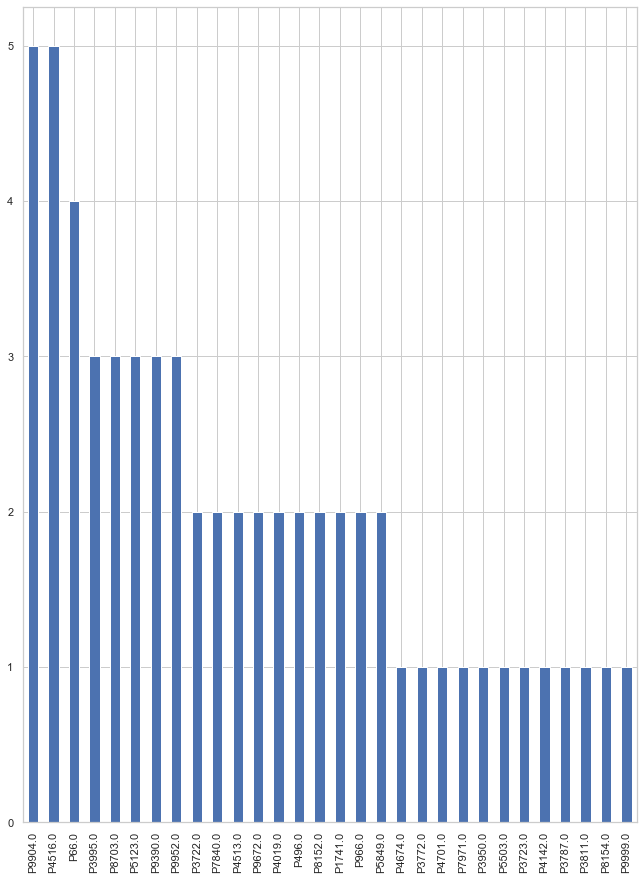

In [94]:
outpatient_procedure_code[outpatient_procedure_code["PotentialFraud"] == "Yes"]["ClmProcedureCode"].value_counts()[:30].plot(kind='bar')

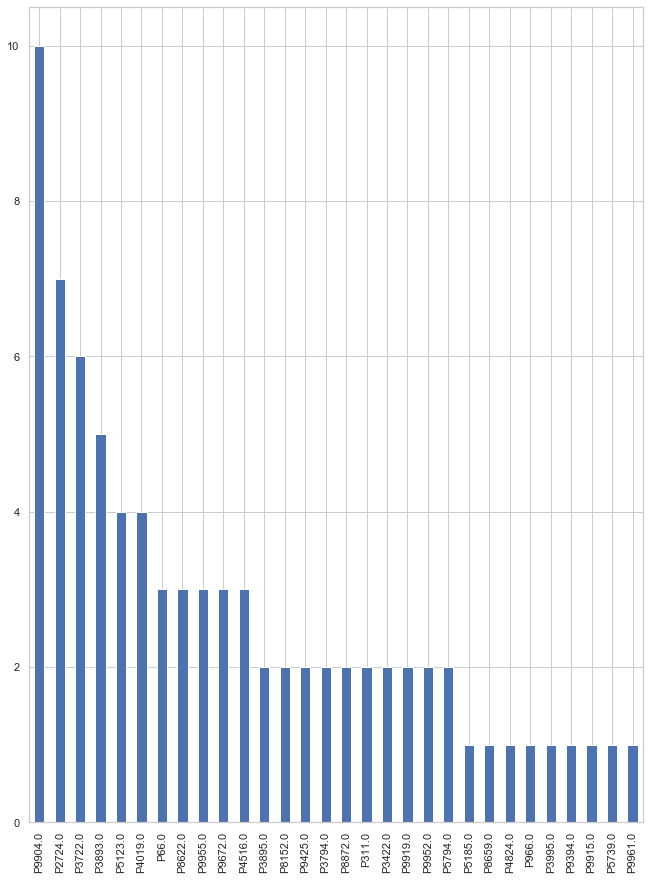

In [95]:
outpatient_procedure_code[outpatient_procedure_code["PotentialFraud"] == "No"]["ClmProcedureCode"].value_counts()[:30].plot(kind='bar')

In [96]:
fraud_claim_code = set(outpatient_procedure_code[outpatient_procedure_code["PotentialFraud"] == "Yes"]["ClmProcedureCode"].value_counts().index)
non_fraud_claim_code = set(outpatient_procedure_code[outpatient_procedure_code["PotentialFraud"] == "No"]["ClmProcedureCode"].value_counts().index)
print(fraud_claim_code - non_fraud_claim_code)

{'P8051.0', 'P5849.0', 'P4439.0', 'P9999.0', 'P9390.0', 'P8154.0', 'P8627.0', 'P5503.0', 'P4142.0', 'P496.0', 'P3950.0', 'P7971.0', 'P4674.0', 'P3772.0', 'P3811.0', 'P3787.0', 'P239.0', 'P604.0', 'P7804.0', 'P2763.0', 'P5119.0', 'P7862.0', 'P8669.0', 'P4299.0', 'P7840.0', 'P4573.0', 'P8151.0', 'P387.0', 'P7915.0', 'P4311.0', 'P4701.0', 'P4023.0', 'P4523.0', 'P8541.0', 'P1741.0', 'P151.0', 'P9671.0', 'P8703.0', 'P3783.0', 'P4401.0'}


In [97]:
len(fraud_claim_code - non_fraud_claim_code)

40

In [98]:
len(outpatient_procedure_code[outpatient_procedure_code['ClmProcedureCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("ClaimID"))

42

In [99]:
len(outpatient_procedure_code[outpatient_procedure_code['ClmProcedureCode'].isin(list(fraud_claim_code - non_fraud_claim_code))].groupby("Provider"))

39

In [100]:
outpatient_provider[outpatient_provider["ClaimID"].isin(outpatient_procedure_code[outpatient_procedure_code['ClmProcedureCode'].isin(list(fraud_claim_code - non_fraud_claim_code))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / outpatient_provider["InscClaimAmtReimbursed"].sum()

0.2682835813847944

<h3>Observations</h3>

<h3>Attending Physicians</h3>

Inpatient

In [101]:
inpatient_provider["AttendingPhysician"].describe()

count         40362
unique        11604
top       PHY422134
freq            386
Name: AttendingPhysician, dtype: object

Top 30 Attending Physician involved in fraud

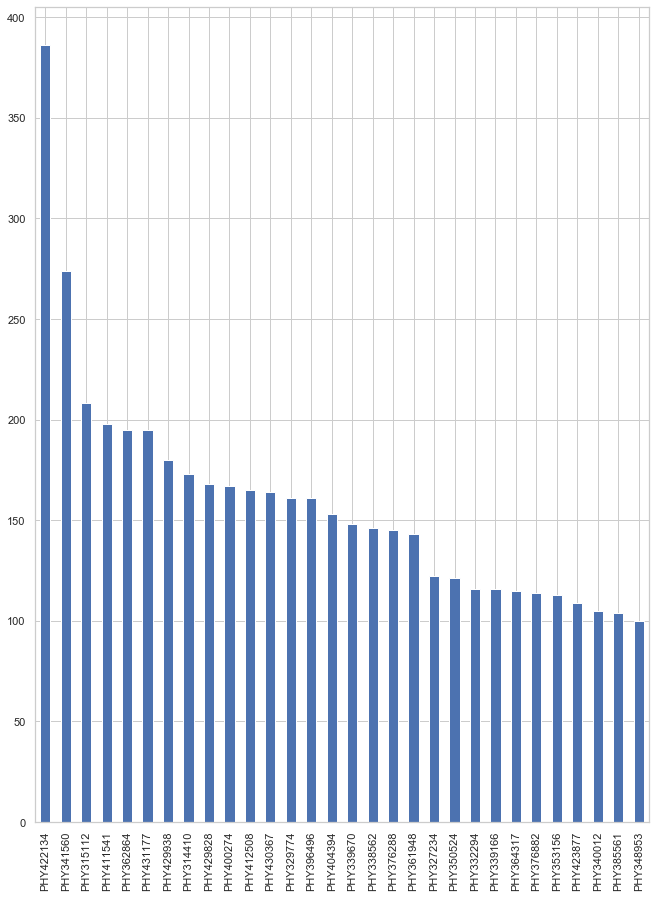

In [102]:
inpatient_provider[inpatient_provider["PotentialFraud"] == "Yes"]["AttendingPhysician"].value_counts()[:30].plot(kind='bar')

Top 30 Attending Physician not involved in fraud

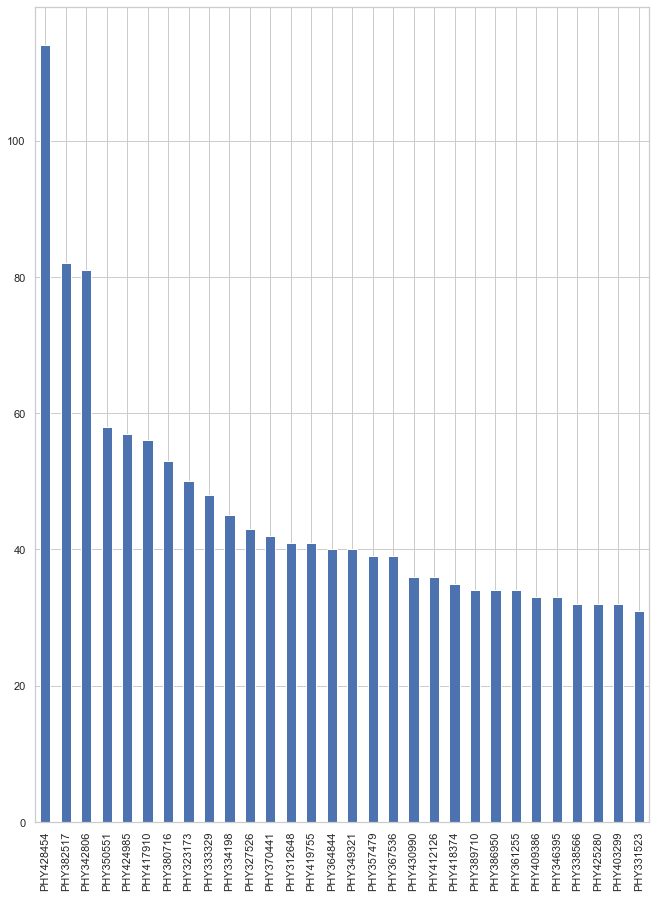

In [103]:
inpatient_provider[inpatient_provider["PotentialFraud"] == "No"]["AttendingPhysician"].value_counts()[:30].plot(kind='bar')

Fraud Physicians 

In [104]:
fraud_attending_physician = set(inpatient_provider[inpatient_provider["PotentialFraud"] == "Yes"]["AttendingPhysician"].value_counts().index)
non_fraud_attending_physician = set(inpatient_provider[inpatient_provider["PotentialFraud"] == "No"]["AttendingPhysician"].value_counts().index)
print(fraud_attending_physician - non_fraud_attending_physician)

{'PHY334311', 'PHY400554', 'PHY336466', 'PHY338453', 'PHY414315', 'PHY357233', 'PHY413804', 'PHY370035', 'PHY353469', 'PHY341929', 'PHY375329', 'PHY378418', 'PHY359231', 'PHY351339', 'PHY335810', 'PHY337904', 'PHY410897', 'PHY357098', 'PHY433849', 'PHY429127', 'PHY396281', 'PHY344240', 'PHY387280', 'PHY410069', 'PHY408929', 'PHY402409', 'PHY370924', 'PHY356802', 'PHY381908', 'PHY419241', 'PHY390791', 'PHY336418', 'PHY378025', 'PHY375979', 'PHY341383', 'PHY414297', 'PHY407687', 'PHY410164', 'PHY391106', 'PHY430791', 'PHY405700', 'PHY334295', 'PHY380591', 'PHY336307', 'PHY353998', 'PHY404455', 'PHY320770', 'PHY398289', 'PHY361814', 'PHY334608', 'PHY411285', 'PHY420113', 'PHY362546', 'PHY410073', 'PHY426039', 'PHY408286', 'PHY392319', 'PHY431809', 'PHY315160', 'PHY330333', 'PHY405698', 'PHY359812', 'PHY370819', 'PHY410061', 'PHY364168', 'PHY379686', 'PHY329415', 'PHY368144', 'PHY316712', 'PHY400663', 'PHY370896', 'PHY361706', 'PHY360701', 'PHY414014', 'PHY321787', 'PHY433487', 'PHY407895'

Counting total physician who are involved in fraud

In [105]:
len(fraud_attending_physician)

4052

Counting total physician who are only involved in fraud

In [106]:
len(fraud_attending_physician - non_fraud_attending_physician)

3981

In [107]:
inpatient_provider.shape

(40474, 32)

Number claims involving fraud physician

In [108]:
len(inpatient_provider[inpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician - non_fraud_attending_physician))].groupby("ClaimID"))

22929

Number Provider involving fraud physician

In [109]:
len(inpatient_provider[inpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician - non_fraud_attending_physician))].groupby("Provider"))

437

Percentage of money lost to only fraud physicians

In [110]:
inpatient_provider[inpatient_provider["ClaimID"].isin(inpatient_provider[inpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician - non_fraud_attending_physician))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / inpatient_provider["InscClaimAmtReimbursed"].sum()

57.80407851127593

Number of attending physicians who are involved in both fraud and non fraud claims

In [111]:
len(fraud_attending_physician.intersection(non_fraud_attending_physician))

71

Number of claims involving attending physicians who are involved in both fraud and non fraud claims

In [112]:
len(inpatient_provider[inpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician.intersection(non_fraud_attending_physician)))].groupby("ClaimID"))

554

Number of provider involving attending physicians who are involved in both fraud and non fraud claims

In [113]:
len(inpatient_provider[(inpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician.intersection(non_fraud_attending_physician)))) ].groupby("Provider"))

110

In [114]:
len(inpatient_provider[(inpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician.intersection(non_fraud_attending_physician)))) & (inpatient_provider["PotentialFraud"] == "Yes")].groupby("Provider"))

54

<h3>Observations</h3>
We can easily seprate out fraud and non fraud physician.
<br>Out of 11604 physicians 4052 are the ones who are only involved in fraud with 22929 claim in total 40474 inpatient claims.
<br>Money lost to fraud physicians is 57.8 % which is a very high number.
<br>There are physicians who are in both fraud and non fraud claim but the count is very less 71. These physicians are involve in only 554 claims with 110 providers out of which 54 are fraud provider.
<br>Out of 440 fraud provider 437 are involved with only fraud attending physicians

Outpatient

In [115]:
outpatient_provider["AttendingPhysician"].describe()

count        516341
unique        74109
top       PHY330576
freq           2534
Name: AttendingPhysician, dtype: object

Top 30 fraud attending physicians

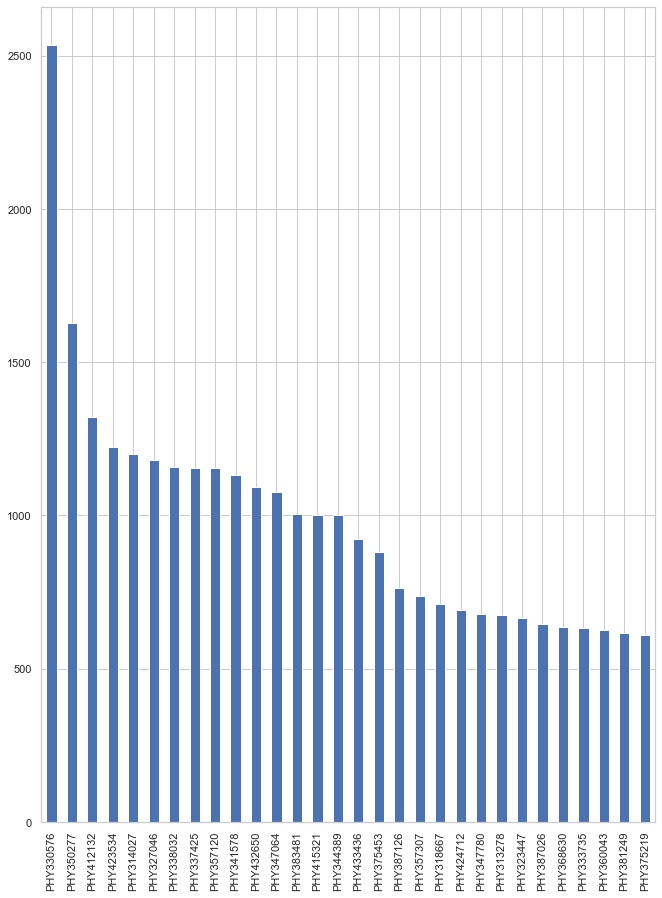

In [116]:
outpatient_provider[outpatient_provider["PotentialFraud"] == "Yes"]["AttendingPhysician"].value_counts()[:30].plot(kind='bar')

Top 30 non fraud attending physicians

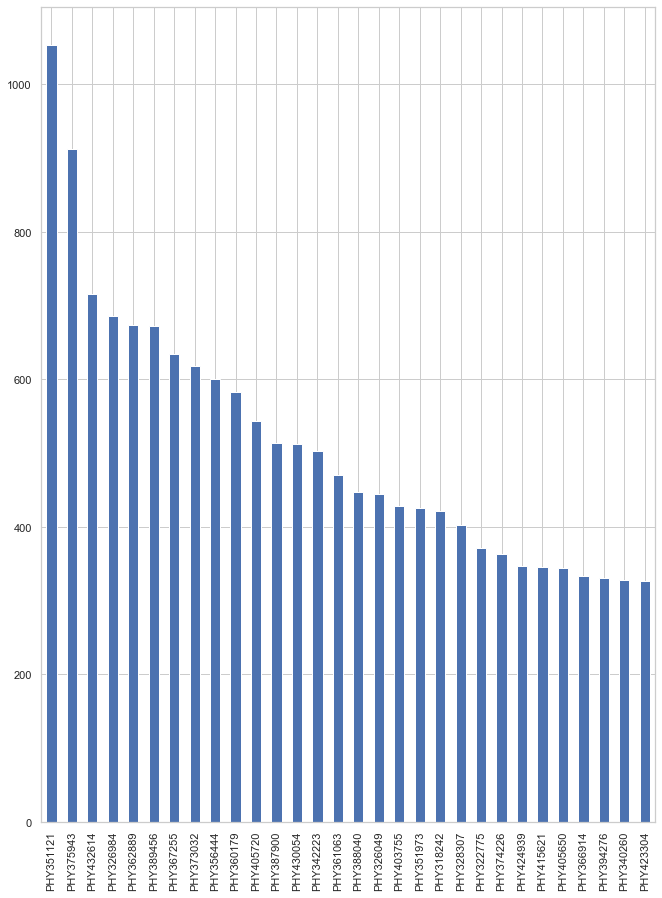

In [117]:
outpatient_provider[outpatient_provider["PotentialFraud"] == "No"]["AttendingPhysician"].value_counts()[:30].plot(kind='bar')

Only Fraud Physicians

In [118]:
fraud_attending_physician = set(outpatient_provider[outpatient_provider["PotentialFraud"] == "Yes"]["AttendingPhysician"].value_counts().index)
non_fraud_attending_physician = set(outpatient_provider[outpatient_provider["PotentialFraud"] == "No"]["AttendingPhysician"].value_counts().index)
print(fraud_attending_physician - non_fraud_attending_physician)

{'PHY402926', 'PHY372489', 'PHY325104', 'PHY422082', 'PHY319320', 'PHY357233', 'PHY370035', 'PHY398943', 'PHY431334', 'PHY353834', 'PHY386188', 'PHY419417', 'PHY376268', 'PHY374580', 'PHY408837', 'PHY409310', 'PHY382139', 'PHY326086', 'PHY392301', 'PHY329410', 'PHY431591', 'PHY398769', 'PHY410731', 'PHY312361', 'PHY326143', 'PHY406845', 'PHY426594', 'PHY378025', 'PHY336418', 'PHY389389', 'PHY350408', 'PHY379193', 'PHY347650', 'PHY331735', 'PHY428278', 'PHY319712', 'PHY403411', 'PHY343954', 'PHY433654', 'PHY405915', 'PHY347294', 'PHY318661', 'PHY380868', 'PHY341061', 'PHY350352', 'PHY429199', 'PHY386085', 'PHY333249', 'PHY430015', 'PHY429967', 'PHY408788', 'PHY353588', 'PHY334742', 'PHY369052', 'PHY431438', 'PHY394073', 'PHY430249', 'PHY382213', 'PHY410610', 'PHY325037', 'PHY377108', 'PHY366651', 'PHY315176', 'PHY375088', 'PHY348995', 'PHY410061', 'PHY429247', 'PHY393374', 'PHY325821', 'PHY352376', 'PHY370951', 'PHY395792', 'PHY395120', 'PHY397792', 'PHY369319', 'PHY360701', 'PHY414014'

Number of only fraud physician

In [119]:
len(fraud_attending_physician - non_fraud_attending_physician)

16492

Number of claim involving only fraud Physician

In [120]:
len(outpatient_provider[outpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician - non_fraud_attending_physician))].groupby("ClaimID"))

178987

In [121]:
outpatient_provider.shape

(517737, 28)

Number of provider with fraud attending physicians

In [122]:
len(outpatient_provider[outpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician - non_fraud_attending_physician))].groupby("Provider"))

457

Percentage of money lost only fraud attending physicians

In [123]:
outpatient_provider[outpatient_provider["ClaimID"].isin(outpatient_provider[outpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician - non_fraud_attending_physician))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / outpatient_provider["InscClaimAmtReimbursed"].sum()

34.69388608619234

Number of attending physicians who are involved in both fraud and non fraud claims

In [124]:
len(fraud_attending_physician.intersection(non_fraud_attending_physician))

1270

Number of claims involving attending physicians who are involved in both fraud and non fraud claims

In [125]:
len(outpatient_provider[outpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician.intersection(non_fraud_attending_physician)))].groupby("ClaimID"))

17865

Number of provider involving attending physicians who are involved in both fraud and non fraud claims

In [126]:
len(outpatient_provider[(outpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician.intersection(non_fraud_attending_physician)))) ].groupby("Provider"))

1061

In [127]:
len(outpatient_provider[(outpatient_provider['AttendingPhysician'].isin(list(fraud_attending_physician.intersection(non_fraud_attending_physician)))) & (inpatient_provider["PotentialFraud"] == "Yes")].groupby("Provider"))

312

<h3>Observations</h3>
Out of 74109 physicians 16492 are only involved in fraud with 178987 claims.
<br>Out of 462 fraud provider 457 are involved with only fraud provider.
<br>1270 physicians are involved in fraud and non fraud claims with total 17865 claims.These physicians are involved with 1061 provider out of which 312 are fraud.
<br>Money lost to these fraud physicians is 34.6% of total money.

<h3>Observations</h3>
<b>If we figure out only fraud physician we can recover significant money. Of 60% of money lost in inpatient 57% involve only fraud physician. Of 37% money lost on outpatient 34.6% can be avoided if we know only fraud admitting physician.</b>

<h3>OperatingPhysician</h3>

Inpatient

In [128]:
inpatient_provider["OperatingPhysician"].describe()

count         23830
unique         8287
top       PHY429430
freq            225
Name: OperatingPhysician, dtype: object

Top 30 Operating Physician involved in fraud

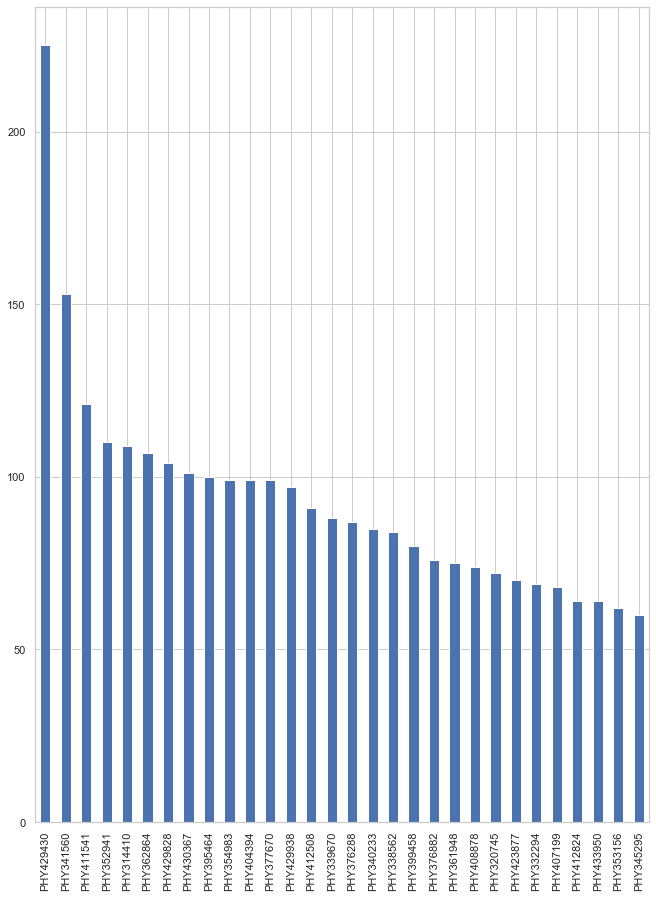

In [129]:
inpatient_provider[inpatient_provider["PotentialFraud"] == "Yes"]["OperatingPhysician"].value_counts()[:30].plot(kind='bar')

Top 30 Attending Physician not involved in fraud

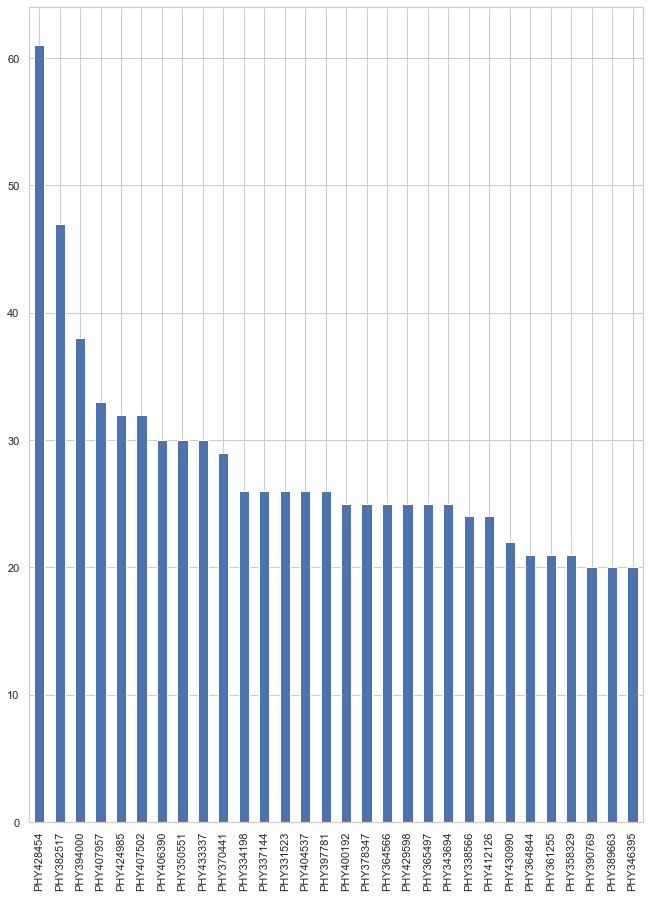

In [130]:
inpatient_provider[inpatient_provider["PotentialFraud"] == "No"]["OperatingPhysician"].value_counts()[:30].plot(kind='bar')

Fraud Physicians 

In [131]:
fraud_opert_physician = set(inpatient_provider[inpatient_provider["PotentialFraud"] == "Yes"]["OperatingPhysician"].value_counts().index)
non_fraud_opert_physician = set(inpatient_provider[inpatient_provider["PotentialFraud"] == "No"]["OperatingPhysician"].value_counts().index)
print(fraud_opert_physician - non_fraud_opert_physician)

{'PHY356615', 'PHY384577', 'PHY413309', 'PHY357233', 'PHY338748', 'PHY353469', 'PHY347943', 'PHY339584', 'PHY359231', 'PHY351339', 'PHY422145', 'PHY431249', 'PHY326086', 'PHY396281', 'PHY318577', 'PHY357098', 'PHY429127', 'PHY406428', 'PHY344240', 'PHY433849', 'PHY339248', 'PHY387280', 'PHY370924', 'PHY356802', 'PHY387316', 'PHY419241', 'PHY360769', 'PHY318255', 'PHY336418', 'PHY410164', 'PHY414297', 'PHY354741', 'PHY391106', 'PHY334295', 'PHY331727', 'PHY394470', 'PHY380591', 'PHY353998', 'PHY315277', 'PHY316485', 'PHY333039', 'PHY423868', 'PHY328477', 'PHY320434', 'PHY397519', 'PHY331408', 'PHY420113', 'PHY390856', 'PHY381007', 'PHY386085', 'PHY388495', 'PHY429660', 'PHY390351', 'PHY341018', 'PHY429866', 'PHY315160', 'PHY359812', 'PHY337803', 'PHY320389', 'PHY323574', 'PHY405567', 'PHY397792', 'PHY361706', 'PHY360701', 'PHY414014', 'PHY321787', 'PHY373004', 'PHY321918', 'PHY419325', 'PHY385153', 'PHY380889', 'PHY376955', 'PHY328879', 'PHY360862', 'PHY342257', 'PHY333826', 'PHY326481'

Counting total physician who are involved in fraud

In [132]:
len(fraud_opert_physician)

3074

Counting total physician who are only involved in fraud

In [133]:
len(fraud_opert_physician - non_fraud_opert_physician)

3038

In [134]:
inpatient_provider.shape

(40474, 32)

Number claims involving fraud physician

In [135]:
len(inpatient_provider[inpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician - non_fraud_opert_physician))].groupby("ClaimID"))

13691

Number Provider involving fraud physician

In [136]:
len(inpatient_provider[inpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician - non_fraud_opert_physician))].groupby("Provider"))

436

Percentage of money lost to only fraud physicians

In [137]:
inpatient_provider[inpatient_provider["ClaimID"].isin(inpatient_provider[inpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician - non_fraud_opert_physician))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / inpatient_provider["InscClaimAmtReimbursed"].sum()

42.639341330485344

Number of attending physicians who are involved in both fraud and non fraud claims

In [138]:
len(fraud_opert_physician.intersection(non_fraud_opert_physician))

36

Number of claims involving attending physicians who are involved in both fraud and non fraud claims

In [139]:
len(inpatient_provider[inpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician.intersection(non_fraud_opert_physician)))].groupby("ClaimID"))

212

Number of provider involving attending physicians who are involved in both fraud and non fraud claims

In [140]:
len(inpatient_provider[(inpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician.intersection(non_fraud_opert_physician)))) ].groupby("Provider"))

66

In [141]:
len(inpatient_provider[(inpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician.intersection(non_fraud_opert_physician)))) & (inpatient_provider["PotentialFraud"] == "Yes")].groupby("Provider"))

34

<h3>Observations</h3>
We can easily seprate out fraud and non fraud physician.
<br>Out of 8287 physicians 3038 are the ones who are only involved in fraud with 13691 claim in total 40474 inpatient claims.
<br>Money lost to fraud physicians is 42.6 % which is a very high number.
<br>There are physicians who are in both fraud and non fraud claim but the count is very less 36. These physicians are involve in only 212 claims with 66 providers out of which 34 are fraud provider.
<br>Out of 440 fraud provider 436 are involved with only fraud attending physicians

Outpatient

In [142]:
outpatient_provider["OperatingPhysician"].describe()

count         90617
unique        28532
top       PHY330576
freq            424
Name: OperatingPhysician, dtype: object

Top 30 fraud Operating physicians

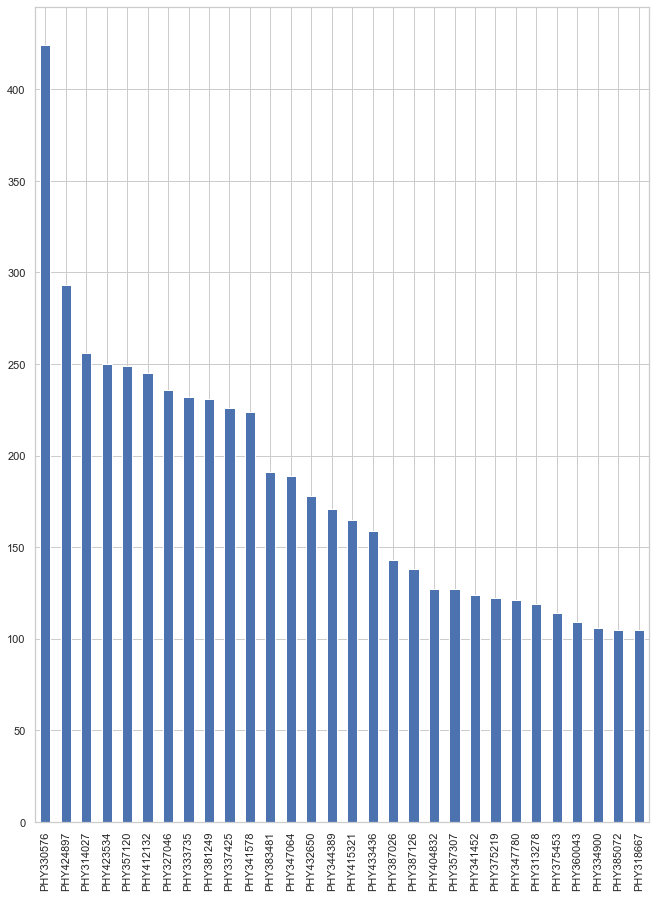

In [143]:
outpatient_provider[outpatient_provider["PotentialFraud"] == "Yes"]["OperatingPhysician"].value_counts()[:30].plot(kind='bar')

Top 30 non fraud operating physicians

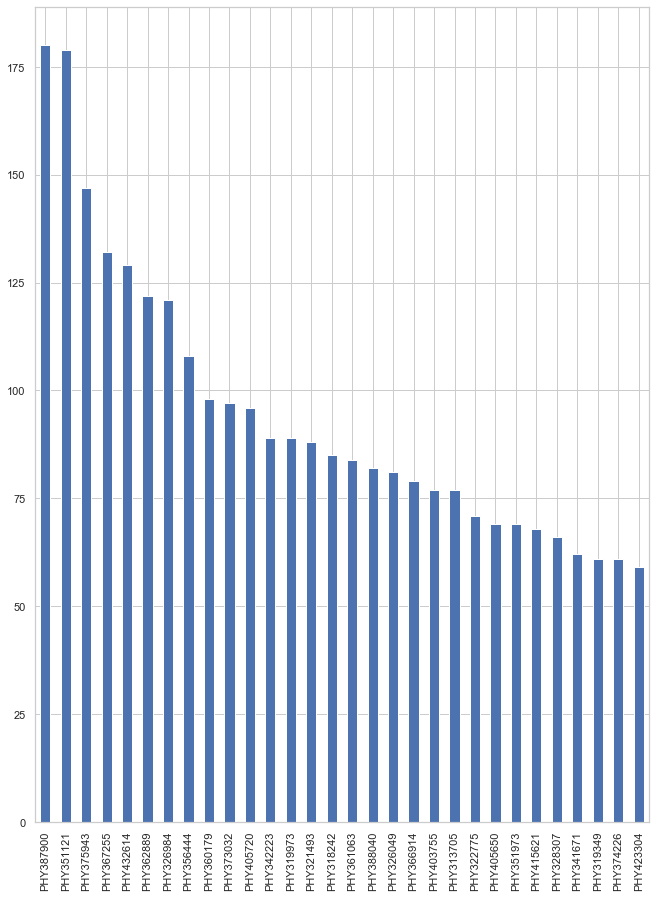

In [144]:
outpatient_provider[outpatient_provider["PotentialFraud"] == "No"]["OperatingPhysician"].value_counts()[:30].plot(kind='bar')

Only Fraud Physicians

In [145]:
fraud_opert_physician = set(outpatient_provider[outpatient_provider["PotentialFraud"] == "Yes"]["OperatingPhysician"].value_counts().index)
non_fraud_opert_physician = set(outpatient_provider[outpatient_provider["PotentialFraud"] == "No"]["OperatingPhysician"].value_counts().index)
print(fraud_opert_physician - non_fraud_opert_physician)

{'PHY400007', 'PHY402926', 'PHY372489', 'PHY325104', 'PHY387960', 'PHY357233', 'PHY353834', 'PHY431334', 'PHY326835', 'PHY386188', 'PHY376268', 'PHY326086', 'PHY392301', 'PHY329410', 'PHY410731', 'PHY406845', 'PHY316424', 'PHY335051', 'PHY350408', 'PHY319712', 'PHY394757', 'PHY405915', 'PHY347294', 'PHY380868', 'PHY341061', 'PHY408788', 'PHY353588', 'PHY325037', 'PHY382213', 'PHY375088', 'PHY393374', 'PHY325821', 'PHY370951', 'PHY395792', 'PHY409278', 'PHY393054', 'PHY385012', 'PHY411235', 'PHY386534', 'PHY338777', 'PHY359423', 'PHY416625', 'PHY429218', 'PHY430739', 'PHY379928', 'PHY374049', 'PHY409901', 'PHY317092', 'PHY389610', 'PHY332977', 'PHY342238', 'PHY341020', 'PHY369710', 'PHY330783', 'PHY431128', 'PHY313493', 'PHY432229', 'PHY370374', 'PHY398479', 'PHY321065', 'PHY388067', 'PHY367313', 'PHY430411', 'PHY433690', 'PHY418704', 'PHY356816', 'PHY357595', 'PHY414178', 'PHY420472', 'PHY393784', 'PHY392170', 'PHY368281', 'PHY390675', 'PHY400766', 'PHY319558', 'PHY398411', 'PHY423682'

Number of only fraud physician

In [146]:
len(fraud_opert_physician - non_fraud_opert_physician)

6938

Number of claim involving only fraud Physician

In [147]:
len(outpatient_provider[outpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician - non_fraud_opert_physician))].groupby("ClaimID"))

32292

In [148]:
outpatient_provider.shape

(517737, 28)

Number of provider with fraud attending physicians

In [149]:
len(outpatient_provider[outpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician - non_fraud_opert_physician))].groupby("Provider"))

447

Percentage of money lost only fraud attending physicians

In [150]:
outpatient_provider[outpatient_provider["ClaimID"].isin(outpatient_provider[outpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician - non_fraud_opert_physician))]["ClaimID"].unique())]["InscClaimAmtReimbursed"].sum() * 100 / outpatient_provider["InscClaimAmtReimbursed"].sum()

9.688725748775077

Number of operating physicians who are involved in both fraud and non fraud claims

In [151]:
len(fraud_opert_physician.intersection(non_fraud_opert_physician))

228

Number of claims involving attending physicians who are involved in both fraud and non fraud claims

In [152]:
len(outpatient_provider[outpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician.intersection(non_fraud_opert_physician)))].groupby("ClaimID"))

1548

Number of provider involving attending physicians who are involved in both fraud and non fraud claims

In [153]:
len(outpatient_provider[(outpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician.intersection(non_fraud_opert_physician)))) ].groupby("Provider"))

339

In [154]:
len(outpatient_provider[(outpatient_provider['OperatingPhysician'].isin(list(fraud_opert_physician.intersection(non_fraud_opert_physician)))) & (inpatient_provider["PotentialFraud"] == "Yes")].groupby("Provider"))

54

<h3>Observations</h3>
We can easily seprate out fraud and non fraud physician.
<br>Out of 28532 physicians 6938 are the ones who are only involved in fraud with 32293 claim in total 517737 outpatient claims.
<br>Money lost to fraud physicians is 9.6 %.
<br>There are physicians who are in both fraud and non fraud claim but the count is very less 228. These physicians are involve in only 1548 claims with 339 providers out of which 54 are fraud provider.
<br>Out of 462 fraud provider 447 are involved with only fraud operating physicians

<h3>Observations</h3>
<b>Out of 59% inptatient money lost 42% is due to fraud operating physicians. Out of 37% of outpatient money lost 9.6% is due fraud operating physicians<b>

<h3>Beneficiary</h3>

In [10]:
beneficiary_df = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")

In [11]:
beneficiary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [156]:
beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [157]:
beneficiary_df.shape

(138556, 25)

In [158]:
beneficiary_df["County"] = "C" + beneficiary_df["County"].astype(str)

In [159]:
beneficiary_df["State"] = "S" + beneficiary_df["State"].astype(str)

Inpatient Analysis

In [160]:
inpatient_beneficiary_detail = pd.merge(beneficiary_df, inpatient_provider, how="inner", on='BeneID')

In [161]:
inpatient_beneficiary_detail.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,AdmitDays
0,BENE11001,1943-01-01,NaN,1,1,0,S39,C230,12,12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,7
1,BENE11001,1943-01-01,NaN,1,1,0,S39,C230,12,12,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No,3
2,BENE11001,1943-01-01,NaN,1,1,0,S39,C230,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,4
3,BENE11011,1914-03-01,NaN,2,2,0,S1,C360,12,12,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No,9
4,BENE11014,1938-04-01,NaN,2,1,Y,S45,C780,12,12,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No,18


In [162]:
inpatient_beneficiary_detail["County"].describe()

count     40474
unique      286
top         C10
freq       1130
Name: County, dtype: object

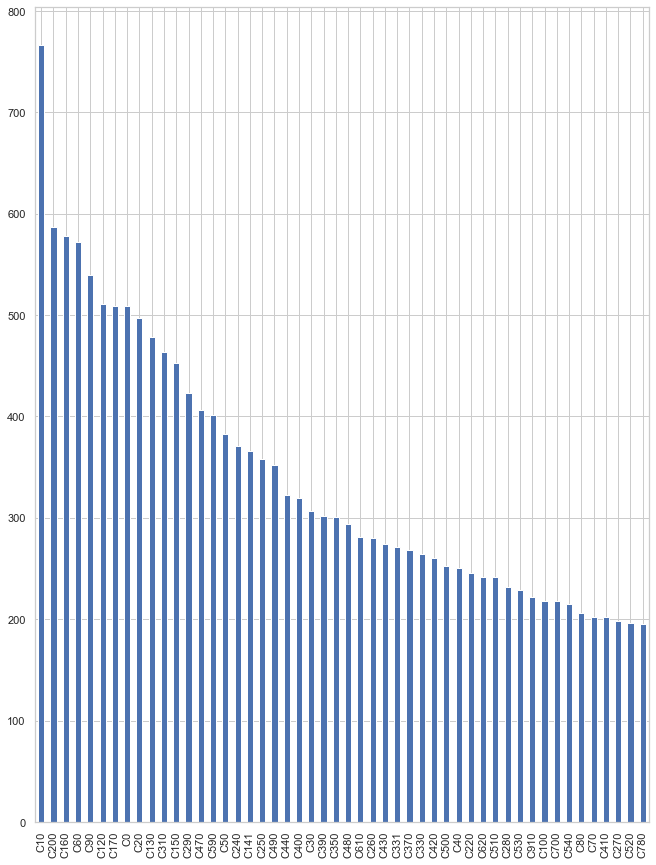

In [163]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["County"].value_counts()[0:50].plot(kind="bar")

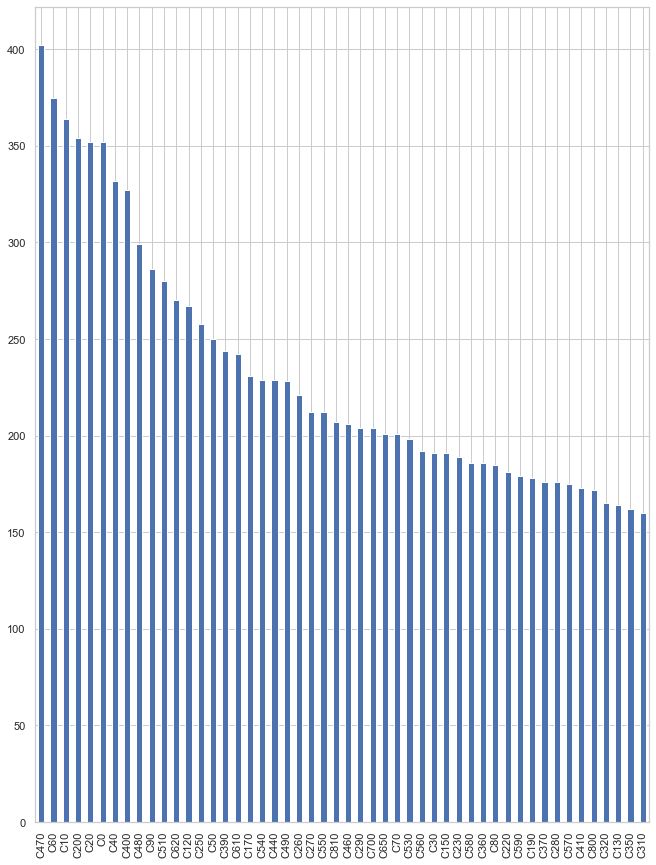

In [164]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "No"]["County"].value_counts()[0:50].plot(kind="bar")

In [165]:
inpatient_count_fraud_county = pd.merge(inpatient_beneficiary_detail["County"].value_counts(), inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["County"].value_counts(), how= "inner", right_index=True, left_index=True)

In [166]:
inpatient_count_fraud_county.head()

,County_x,County_y
C10,1130,766
C60,947,572
C200,941,587
C0,861,509
C20,849,497


In [167]:
inpatient_count_fraud_county["Percentage"] = (inpatient_count_fraud_county["County_y"] * 100 ) / inpatient_count_fraud_county["County_x"]

In [168]:
inpatient_count_fraud_county.head()

,County_x,County_y,Percentage
C10,1130,766,67.787611
C60,947,572,60.401267
C200,941,587,62.380446
C0,861,509,59.117305
C20,849,497,58.539458


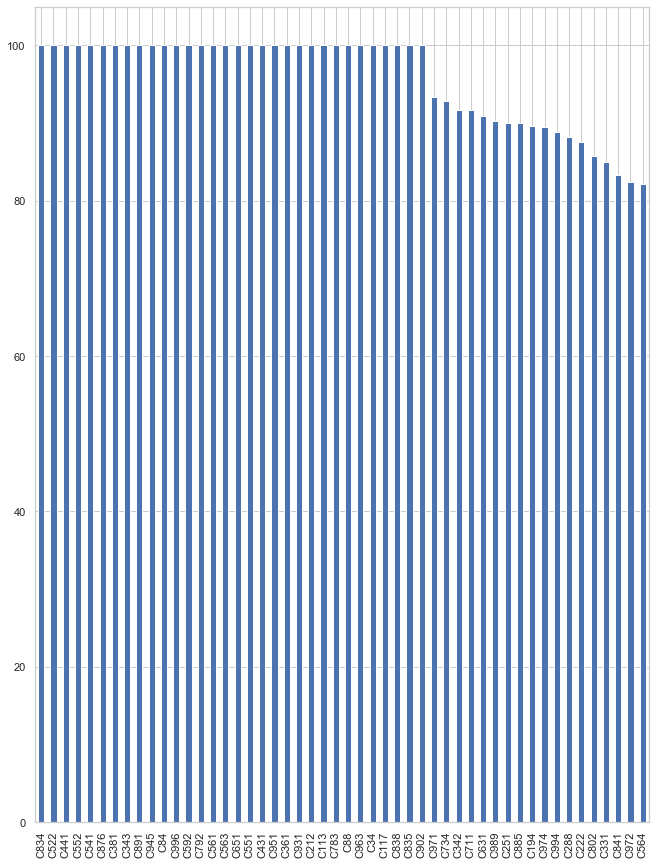

In [169]:
inpatient_count_fraud_county.sort_values("Percentage",ascending=False)["Percentage"][:50].plot(kind="bar")

<h3>Observation</h3>
Percentage of fraud cases in county is important feature to detect fraud claim.
<br>Some of the country has 100% fraud claims for inpatient

Outpatient Analysis

In [170]:
outpatient_beneficiary_detail = pd.merge(beneficiary_df, outpatient_provider, how="inner", on='BeneID')

In [171]:
outpatient_beneficiary_detail.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,1936-09-01,NaN,2,1,0,S39,C280,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,D56409,Yes
1,BENE11003,1936-08-01,NaN,1,1,0,S52,C590,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,D79380,No
2,BENE11003,1936-08-01,NaN,1,1,0,S52,C590,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dnan,No
3,BENE11004,1922-07-01,NaN,1,1,0,S39,C270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dnan,Yes
4,BENE11004,1922-07-01,NaN,1,1,0,S39,C270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,D71947,Yes


In [172]:
outpatient_beneficiary_detail["County"].describe()

count     517737
unique       313
top         C200
freq       15016
Name: County, dtype: object

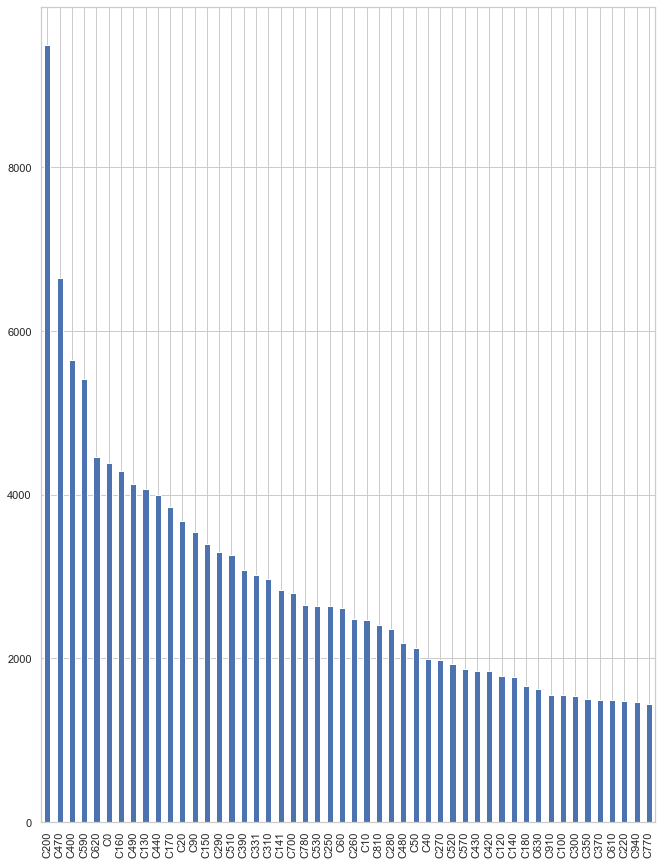

In [173]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["County"].value_counts()[0:50].plot(kind="bar")

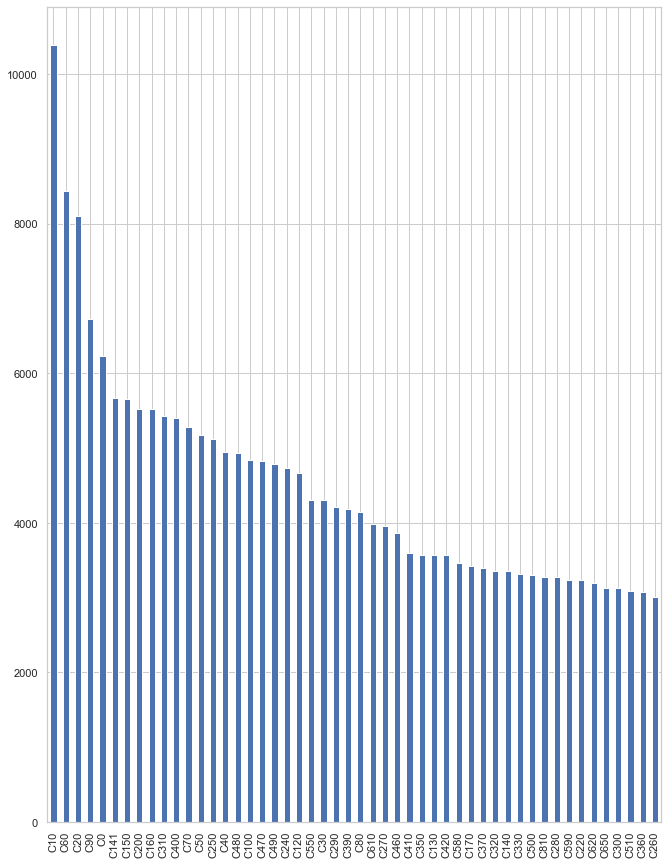

In [174]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "No"]["County"].value_counts()[0:50].plot(kind="bar")

In [175]:
outpatient_count_fraud_county = pd.merge(outpatient_beneficiary_detail["County"].value_counts(), outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["County"].value_counts(), how= "inner", right_index=True, left_index=True)

In [176]:
outpatient_count_fraud_county.head()

,County_x,County_y
C200,15016,9491
C10,12852,2466
C20,11783,3677
C470,11470,6642
C400,11050,5642


In [177]:
outpatient_count_fraud_county["Percentage"] = (outpatient_count_fraud_county["County_y"] * 100 ) / outpatient_count_fraud_county["County_x"]

In [178]:
outpatient_count_fraud_county.head()

,County_x,County_y,Percentage
C200,15016,9491,63.205914
C10,12852,2466,19.187675
C20,11783,3677,31.205975
C470,11470,6642,57.907585
C400,11050,5642,51.058824


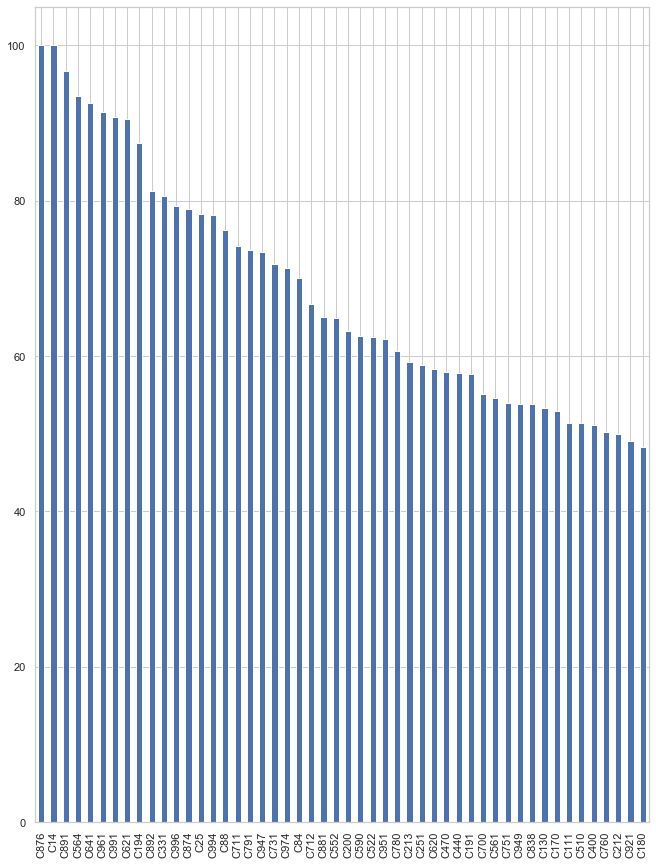

In [179]:
outpatient_count_fraud_county.sort_values("Percentage",ascending=False)["Percentage"][:50].plot(kind="bar")

<h3>Observation</h3>
For outpatient there are less 100 % fraud claims per county than inpatient.
<br>For outpatient there are many county with high number of fraud percentage per county

In [180]:
inpatient_beneficiary_detail["State"].describe()

count     40474
unique       52
top          S5
freq       3468
Name: State, dtype: object

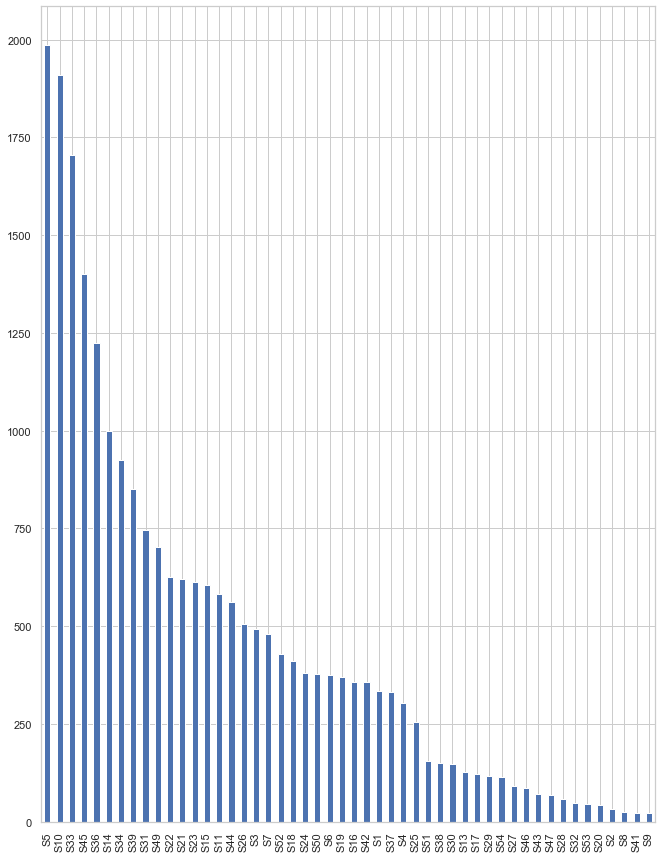

In [181]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["State"].value_counts()[0:50].plot(kind="bar")

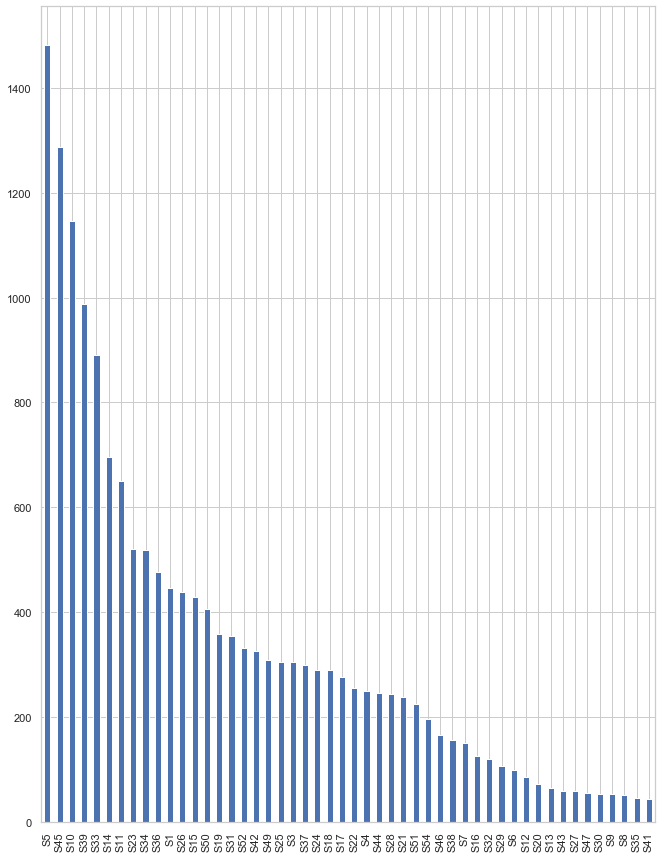

In [182]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "No"]["State"].value_counts()[0:50].plot(kind="bar")

In [183]:
inpatient_count_fraud_state = pd.merge(inpatient_beneficiary_detail["State"].value_counts(), inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["State"].value_counts(), how= "inner", right_index=True, left_index=True)

In [184]:
inpatient_count_fraud_state.head()

,State_x,State_y
S5,3468,1986
S10,3056,1909
S45,2689,1401
S33,2597,1706
S39,1839,852


In [185]:
inpatient_count_fraud_state["Percentage"] = (inpatient_count_fraud_state["State_y"] * 100 ) / inpatient_count_fraud_state["State_x"]

In [186]:
inpatient_count_fraud_state.head()

,State_x,State_y,Percentage
S5,3468,1986,57.266436
S10,3056,1909,62.467277
S45,2689,1401,52.101153
S33,2597,1706,65.691182
S39,1839,852,46.329527


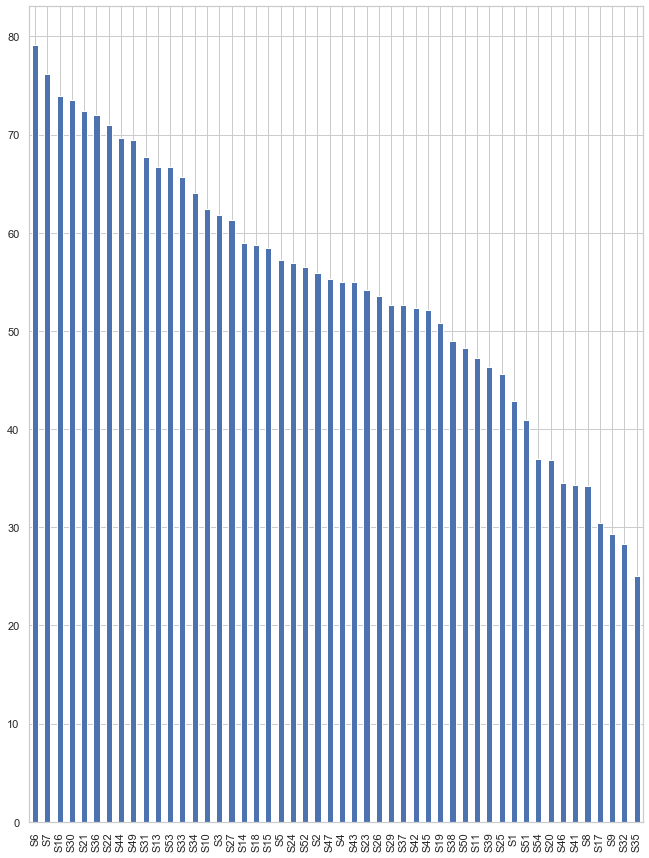

In [187]:
inpatient_count_fraud_state.sort_values("Percentage",ascending=False)["Percentage"][:50].plot(kind="bar")

<h3>Observation</h3>
Percentage of fraud cases in state is important feature to detect fraud claim.
<br>Some of the state has more than 50% fraud claims per state for inpatient.

Outpatient Analysis

In [188]:
outpatient_beneficiary_detail["State"].describe()

count     517737
unique        52
top           S5
freq       47882
Name: State, dtype: object

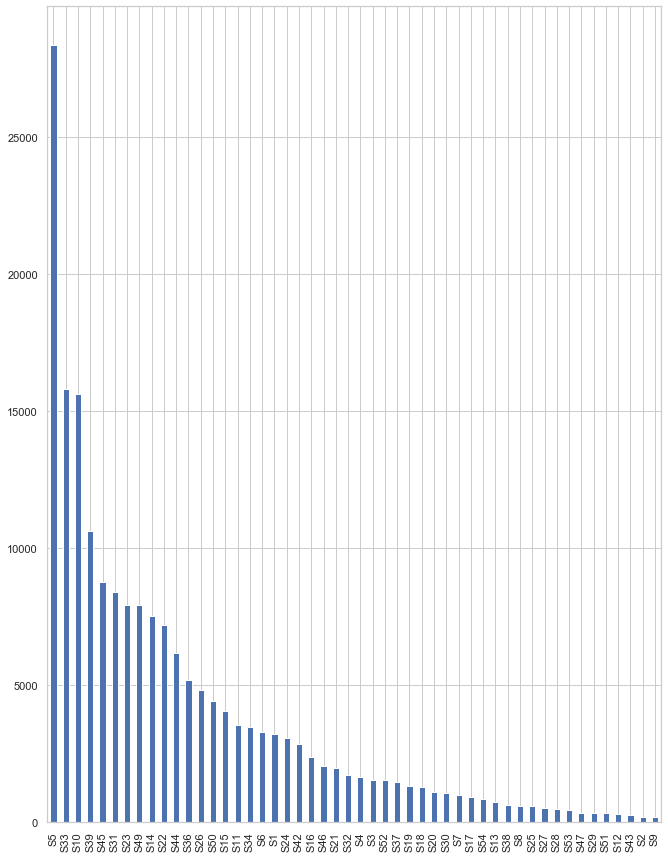

In [189]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["State"].value_counts()[0:50].plot(kind="bar")

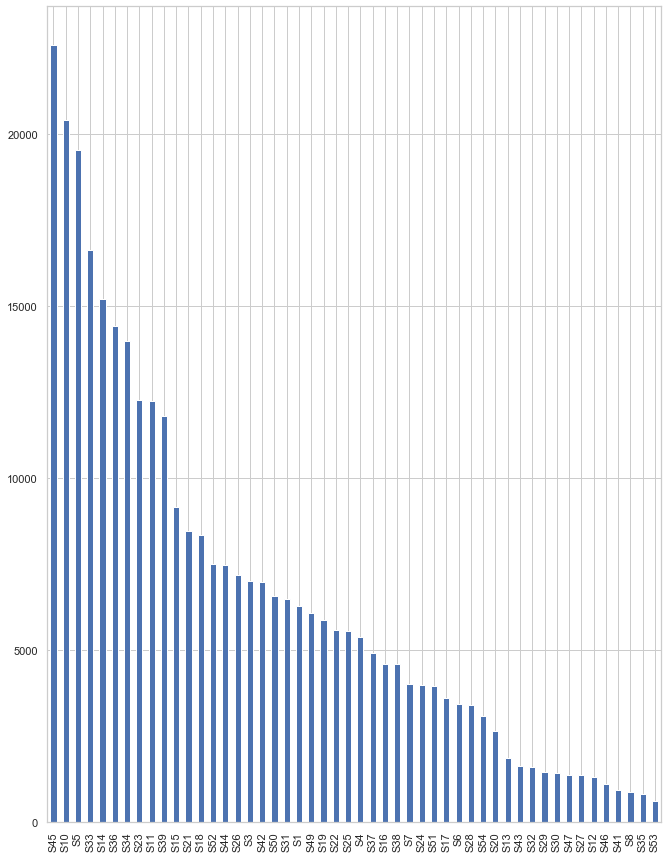

In [190]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "No"]["State"].value_counts()[0:50].plot(kind="bar")

In [191]:
outpatient_count_fraud_state = pd.merge(outpatient_beneficiary_detail["State"].value_counts(), outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["State"].value_counts(), how= "inner", right_index=True, left_index=True)

In [192]:
outpatient_count_fraud_state.head()

,State_x,State_y
S5,47882,28349
S10,36017,15603
S33,32427,15786
S45,31333,8734
S14,22724,7511


In [193]:
outpatient_count_fraud_state["Percentage"] = (outpatient_count_fraud_state["State_y"] * 100 ) / outpatient_count_fraud_state["State_x"]

In [194]:
outpatient_count_fraud_state.head()

,State_x,State_y,Percentage
S5,47882,28349,59.205965
S10,36017,15603,43.321209
S33,32427,15786,48.681654
S45,31333,8734,27.874765
S14,22724,7511,33.053160


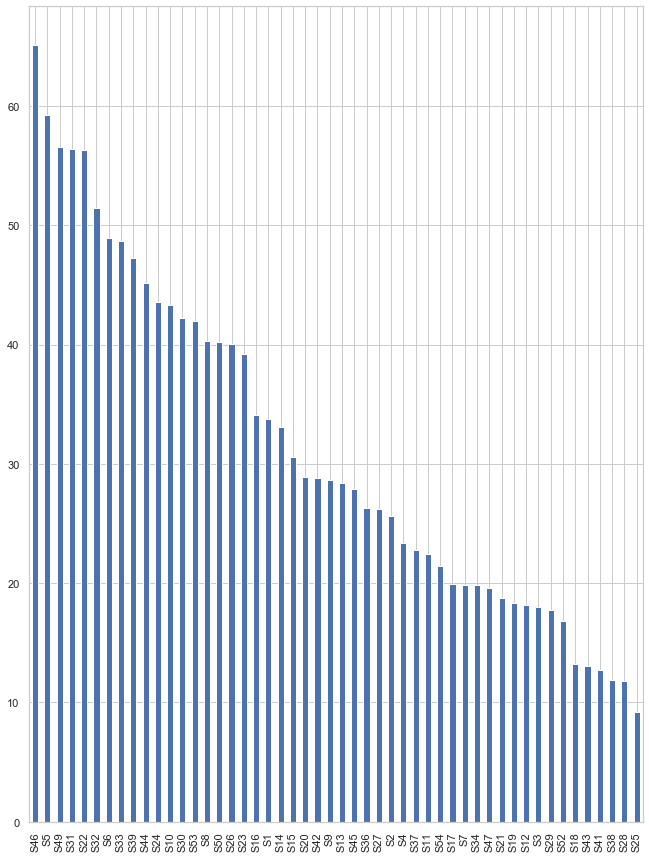

In [195]:
outpatient_count_fraud_state.sort_values("Percentage",ascending=False)["Percentage"][:50].plot(kind="bar")

<h3>Observation</h3>
For outpatient there are less 100 % fraud claims per county than inpatient.
<br>For outpatient there are many county with high number of fraud percentage per county

<h3>Inpatient Analysis for Gender and Race</h3>

In [196]:
inpatient_beneficiary_detail["Gender"] = inpatient_beneficiary_detail["Gender"].replace(2,0)

In [197]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["Gender"].value_counts()

0    13360
1    10042
Name: Gender, dtype: int64

In [198]:
inpatient_beneficiary_detail["Gender"].value_counts()

0    23267
1    17207
Name: Gender, dtype: int64

Percentage of fraud claim per gender

In [199]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["Gender"].value_counts() * 100 / inpatient_beneficiary_detail["Gender"].value_counts()

0    57.420381
1    58.359970
Name: Gender, dtype: float64

<h3>Observation</h3>
58% of total Gender 1 claims are fraud
<br>57% of total Gender 0 claims are fraud
<br> Both gender have almost equall percentage of fraud claim

In [200]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["Race"].value_counts()

1    19736
2     2430
3      770
5      466
Name: Race, dtype: int64

In [201]:
inpatient_beneficiary_detail["Race"].value_counts()

1    34126
2     4202
3     1359
5      787
Name: Race, dtype: int64

In [202]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["Race"].value_counts() * 100 / inpatient_beneficiary_detail["Race"].value_counts()

1    57.832738
2    57.829605
3    56.659308
5    59.212198
Name: Race, dtype: float64

<h3>Observation</h3>
57% of total Race 1 claims are fraud
<br>57% of total Race 2 claims are fraud
<br>56% of total Race 3 claims are fraud
<br>59% of total Race 5 claims are fraud

All the classes of race have same percentage of fraud claims

Outpatient Analysis for Gender and Race

In [203]:
outpatient_beneficiary_detail["Gender"] = outpatient_beneficiary_detail["Gender"].replace(2,0)

In [204]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["Gender"].value_counts()

0    109753
1     79641
Name: Gender, dtype: int64

In [205]:
outpatient_beneficiary_detail["Gender"].value_counts()

0    299847
1    217890
Name: Gender, dtype: int64

In [206]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["Gender"].value_counts() * 100 / outpatient_beneficiary_detail["Gender"].value_counts()

0    36.603001
1    36.551012
Name: Gender, dtype: float64

<h3>Observation</h3>
36% of total Gender 1 claims are fraud
<br>36% of total Gender 0 claims are fraud
<br>In outpatient also both gender equal percentage of fraud claims

In [207]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["Race"].value_counts()

1    158609
2     17854
3      8192
5      4739
Name: Race, dtype: int64

In [208]:
outpatient_beneficiary_detail["Race"].value_counts()

1    436910
2     51438
3     18356
5     11033
Name: Race, dtype: int64

In [209]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["Race"].value_counts() * 100 / outpatient_beneficiary_detail["Race"].value_counts()

1    36.302442
2    34.709748
3    44.628459
5    42.952959
Name: Race, dtype: float64

<h3>Observation</h3>
In case of outpatient race 1 and 2 have less percentage of fraud claims compare to race 3 and 5.

<h3>Age</h3>

Inpatient

In [210]:
inpatient_beneficiary_detail['DOB'] = pd.to_datetime(inpatient_beneficiary_detail['DOB'] , format = '%Y-%m-%d')
inpatient_beneficiary_detail['DOD'] = pd.to_datetime(inpatient_beneficiary_detail['DOD'],format = '%Y-%m-%d')
inpatient_beneficiary_detail['Age'] = round(((inpatient_beneficiary_detail['DOD'] - inpatient_beneficiary_detail['DOB']).dt.days)/365)

Last death date is 1/2/2009 . So we will use this date to calculate age
<br>https://www.kaggle.com/akshaypaliwal709/payee-provider-fraud-detection-analysis

In [211]:
inpatient_beneficiary_detail["Age"].fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - inpatient_beneficiary_detail['DOB']).dt.days)/365),inplace=True)

In [212]:
inpatient_beneficiary_detail.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,AdmitDays,Age
0,BENE11001,1943-01-01,NaT,1,1,0,S39,C230,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,7,67.0
1,BENE11001,1943-01-01,NaT,1,1,0,S39,C230,12,12,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No,3,67.0
2,BENE11001,1943-01-01,NaT,1,1,0,S39,C230,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,4,67.0
3,BENE11011,1914-03-01,NaT,0,2,0,S1,C360,12,12,...,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No,9,96.0
4,BENE11014,1938-04-01,NaT,0,1,Y,S45,C780,12,12,...,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No,18,72.0


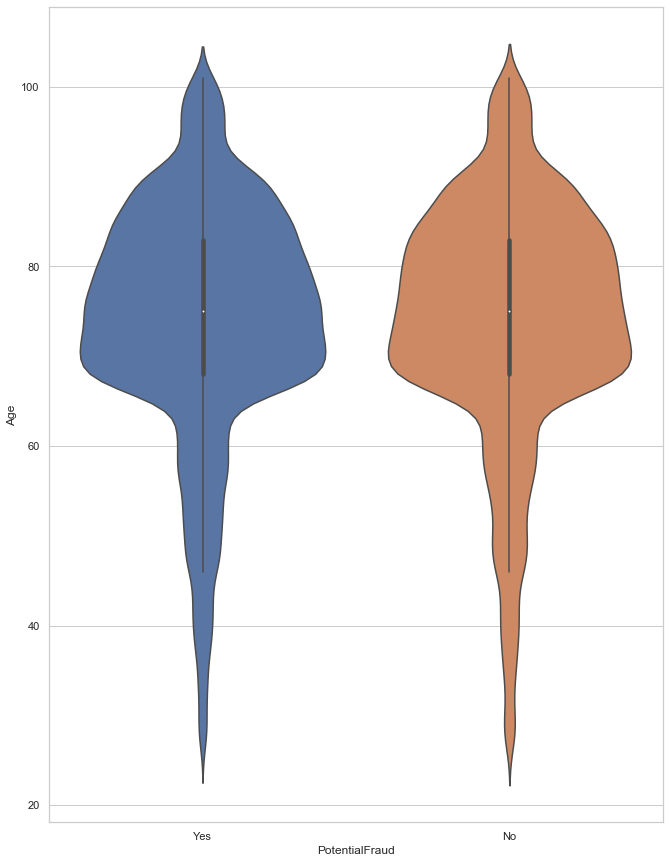

In [213]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="PotentialFraud", y="Age", data=inpatient_beneficiary_detail)

<h3>Observation</h3>
We can see most of inpatient beneficiary age lies between 65-90.
<br>Distribution of age for fraud and non fraud beneficiary is same.

In [214]:
outpatient_beneficiary_detail['DOB'] = pd.to_datetime(outpatient_beneficiary_detail['DOB'] , format = '%Y-%m-%d')
outpatient_beneficiary_detail['DOD'] = pd.to_datetime(outpatient_beneficiary_detail['DOD'],format = '%Y-%m-%d')
outpatient_beneficiary_detail['Age'] = round(((outpatient_beneficiary_detail['DOD'] - outpatient_beneficiary_detail['DOB']).dt.days)/365)

Last death date is 1/2/2009 . So we will use this date to calculate age
<br>https://www.kaggle.com/akshaypaliwal709/payee-provider-fraud-detection-analysis

In [215]:
outpatient_beneficiary_detail["Age"].fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - outpatient_beneficiary_detail['DOB']).dt.days)/365),inplace=True)

In [216]:
outpatient_beneficiary_detail.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,Age
0,BENE11002,1936-09-01,NaT,0,1,0,S39,C280,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,D56409,Yes,73.0
1,BENE11003,1936-08-01,NaT,1,1,0,S52,C590,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,D79380,No,73.0
2,BENE11003,1936-08-01,NaT,1,1,0,S52,C590,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Dnan,No,73.0
3,BENE11004,1922-07-01,NaT,1,1,0,S39,C270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Dnan,Yes,87.0
4,BENE11004,1922-07-01,NaT,1,1,0,S39,C270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,D71947,Yes,87.0


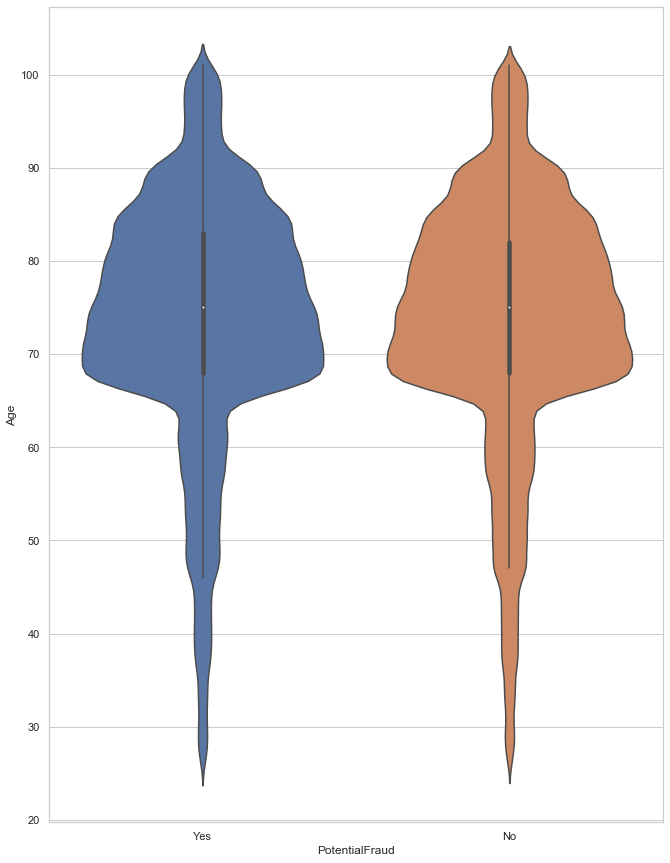

In [217]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="PotentialFraud", y="Age", data=outpatient_beneficiary_detail)

<h3>Observation</h3>
We can see most of inpatient beneficiary age lies between 65-90.
<br>Distribution of age for fraud and non fraud beneficiary is same.

<h3>RenalDiseaseIndicator</h3>

Inpatient

In [218]:
inpatient_beneficiary_detail["RenalDiseaseIndicator"] = inpatient_beneficiary_detail["RenalDiseaseIndicator"].replace('Y',1)

In [219]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["RenalDiseaseIndicator"].value_counts()

0    17291
1     6111
Name: RenalDiseaseIndicator, dtype: int64

In [220]:
inpatient_beneficiary_detail["RenalDiseaseIndicator"].value_counts()

0    29941
1    10533
Name: RenalDiseaseIndicator, dtype: int64

In [221]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["RenalDiseaseIndicator"].value_counts() * 100 / inpatient_beneficiary_detail["RenalDiseaseIndicator"].value_counts()

0    57.750242
1    58.017659
Name: RenalDiseaseIndicator, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of RenalDiseaseIndicator

Outpatient

In [222]:
outpatient_beneficiary_detail["RenalDiseaseIndicator"] = outpatient_beneficiary_detail["RenalDiseaseIndicator"].replace('Y',1)

In [223]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["RenalDiseaseIndicator"].value_counts()

0    152815
1     36579
Name: RenalDiseaseIndicator, dtype: int64

In [224]:
outpatient_beneficiary_detail["RenalDiseaseIndicator"].value_counts()

0    418422
1     99315
Name: RenalDiseaseIndicator, dtype: int64

In [225]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["RenalDiseaseIndicator"].value_counts() * 100 / outpatient_beneficiary_detail["RenalDiseaseIndicator"].value_counts()

0    36.521741
1    36.831294
Name: RenalDiseaseIndicator, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of RenalDiseaseIndicator

<h3>ChronicCond_Alzheimer</h3>

Inpatient

In [226]:
inpatient_beneficiary_detail["ChronicCond_Alzheimer"] = inpatient_beneficiary_detail["ChronicCond_Alzheimer"].replace(2, 0)

In [227]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Alzheimer"].value_counts()

1    11756
0    11646
Name: ChronicCond_Alzheimer, dtype: int64

In [228]:
inpatient_beneficiary_detail["ChronicCond_Alzheimer"].value_counts()

1    20401
0    20073
Name: ChronicCond_Alzheimer, dtype: int64

In [229]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Alzheimer"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_Alzheimer"].value_counts()

1    57.624626
0    58.018233
Name: ChronicCond_Alzheimer, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Alzheimer

Outpatient

In [230]:
outpatient_beneficiary_detail["ChronicCond_Alzheimer"] = outpatient_beneficiary_detail["ChronicCond_Alzheimer"].replace(2,0)

In [231]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Alzheimer"].value_counts()

0    114803
1     74591
Name: ChronicCond_Alzheimer, dtype: int64

In [232]:
outpatient_beneficiary_detail["ChronicCond_Alzheimer"].value_counts()

0    313811
1    203926
Name: ChronicCond_Alzheimer, dtype: int64

In [233]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Alzheimer"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_Alzheimer"].value_counts()

0    36.583485
1    36.577484
Name: ChronicCond_Alzheimer, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Alzheimer

<h3>ChronicCond_Heartfailure</h3>

Inpatient

In [234]:
inpatient_beneficiary_detail["ChronicCond_Heartfailure"] = inpatient_beneficiary_detail["ChronicCond_Heartfailure"].replace(2, 0)

In [235]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Heartfailure"].value_counts()

1    16970
0     6432
Name: ChronicCond_Heartfailure, dtype: int64

In [236]:
inpatient_beneficiary_detail["ChronicCond_Heartfailure"].value_counts()

1    29215
0    11259
Name: ChronicCond_Heartfailure, dtype: int64

In [237]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Heartfailure"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_Heartfailure"].value_counts()

1    58.086599
0    57.127631
Name: ChronicCond_Heartfailure, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Heartfailure

Outpatient

In [238]:
outpatient_beneficiary_detail["ChronicCond_Heartfailure"] = outpatient_beneficiary_detail["ChronicCond_Heartfailure"].replace(2,0)

In [239]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Heartfailure"].value_counts()

1    109876
0     79518
Name: ChronicCond_Heartfailure, dtype: int64

In [240]:
outpatient_beneficiary_detail["ChronicCond_Heartfailure"].value_counts()

1    300368
0    217369
Name: ChronicCond_Heartfailure, dtype: int64

In [241]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Heartfailure"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_Heartfailure"].value_counts()

1    36.580461
0    36.582033
Name: ChronicCond_Heartfailure, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Heartfailure

<h3>ChronicCond_KidneyDisease</h3>

Inpatient

In [242]:
inpatient_beneficiary_detail["ChronicCond_KidneyDisease"] = inpatient_beneficiary_detail["ChronicCond_KidneyDisease"].replace(2, 0)

In [243]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_KidneyDisease"].value_counts()

1    14103
0     9299
Name: ChronicCond_KidneyDisease, dtype: int64

In [244]:
inpatient_beneficiary_detail["ChronicCond_KidneyDisease"].value_counts()

1    24356
0    16118
Name: ChronicCond_KidneyDisease, dtype: int64

In [245]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_KidneyDisease"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_KidneyDisease"].value_counts()

1    57.903597
0    57.693262
Name: ChronicCond_KidneyDisease, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_KidneyDisease

Outpatient

In [246]:
outpatient_beneficiary_detail["ChronicCond_KidneyDisease"] = outpatient_beneficiary_detail["ChronicCond_KidneyDisease"].replace(2,0)

In [247]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_KidneyDisease"].value_counts()

0    113650
1     75744
Name: ChronicCond_KidneyDisease, dtype: int64

In [248]:
outpatient_beneficiary_detail["ChronicCond_KidneyDisease"].value_counts()

0    312109
1    205628
Name: ChronicCond_KidneyDisease, dtype: int64

In [249]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_KidneyDisease"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_KidneyDisease"].value_counts()

0    36.413561
1    36.835450
Name: ChronicCond_KidneyDisease, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_KidneyDisease

<h3>ChronicCond_Cancer</h3>

Inpatient

In [250]:
inpatient_beneficiary_detail["ChronicCond_Cancer"] = inpatient_beneficiary_detail["ChronicCond_Cancer"].replace(2, 0)

In [251]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Cancer"].value_counts()

0    18914
1     4488
Name: ChronicCond_Cancer, dtype: int64

In [252]:
inpatient_beneficiary_detail["ChronicCond_Cancer"].value_counts()

0    32745
1     7729
Name: ChronicCond_Cancer, dtype: int64

In [253]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Cancer"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_Cancer"].value_counts()

0    57.76149
1    58.06702
Name: ChronicCond_Cancer, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Cancer

Outpatient

In [254]:
outpatient_beneficiary_detail["ChronicCond_Cancer"] = outpatient_beneficiary_detail["ChronicCond_Cancer"].replace(2,0)

In [255]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Cancer"].value_counts()

0    161304
1     28090
Name: ChronicCond_Cancer, dtype: int64

In [256]:
outpatient_beneficiary_detail["ChronicCond_Cancer"].value_counts()

0    440961
1     76776
Name: ChronicCond_Cancer, dtype: int64

In [257]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Cancer"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_Cancer"].value_counts()

0    36.580106
1    36.586954
Name: ChronicCond_Cancer, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Cancer

<h3>ChronicCond_ObstrPulmonary</h3>

Inpatient

In [258]:
inpatient_beneficiary_detail["ChronicCond_ObstrPulmonary"] = inpatient_beneficiary_detail["ChronicCond_ObstrPulmonary"].replace(2, 0)

In [259]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_ObstrPulmonary"].value_counts()

0    12151
1    11251
Name: ChronicCond_ObstrPulmonary, dtype: int64

In [260]:
inpatient_beneficiary_detail["ChronicCond_ObstrPulmonary"].value_counts()

0    21081
1    19393
Name: ChronicCond_ObstrPulmonary, dtype: int64

In [261]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_ObstrPulmonary"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_ObstrPulmonary"].value_counts()

0    57.639581
1    58.015779
Name: ChronicCond_ObstrPulmonary, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_ObstrPulmonary

Outpatient

In [262]:
outpatient_beneficiary_detail["ChronicCond_ObstrPulmonary"] = outpatient_beneficiary_detail["ChronicCond_ObstrPulmonary"].replace(2,0)

In [263]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_ObstrPulmonary"].value_counts()

0    132537
1     56857
Name: ChronicCond_ObstrPulmonary, dtype: int64

In [264]:
outpatient_beneficiary_detail["ChronicCond_ObstrPulmonary"].value_counts()

0    362449
1    155288
Name: ChronicCond_ObstrPulmonary, dtype: int64

In [265]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_ObstrPulmonary"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_ObstrPulmonary"].value_counts()

0    36.567076
1    36.613904
Name: ChronicCond_ObstrPulmonary, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_ObstrPulmonary

<h3>ChronicCond_Depression</h3>

Inpatient

In [266]:
inpatient_beneficiary_detail["ChronicCond_Depression"] = inpatient_beneficiary_detail["ChronicCond_Depression"].replace(2, 0)

In [267]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Depression"].value_counts()

1    11763
0    11639
Name: ChronicCond_Depression, dtype: int64

In [268]:
inpatient_beneficiary_detail["ChronicCond_Depression"].value_counts()

1    20327
0    20147
Name: ChronicCond_Depression, dtype: int64

In [269]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Depression"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_Depression"].value_counts()

1    57.868844
0    57.770388
Name: ChronicCond_Depression, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Depression

Outpatient

In [270]:
outpatient_beneficiary_detail["ChronicCond_Depression"] = outpatient_beneficiary_detail["ChronicCond_Depression"].replace(2,0)

In [271]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Depression"].value_counts()

0    108569
1     80825
Name: ChronicCond_Depression, dtype: int64

In [272]:
outpatient_beneficiary_detail["ChronicCond_Depression"].value_counts()

0    295350
1    222387
Name: ChronicCond_Depression, dtype: int64

In [273]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Depression"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_Depression"].value_counts()

0    36.759438
1    36.344301
Name: ChronicCond_Depression, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Depression

<h3>ChronicCond_Diabetes</h3>

Inpatient

In [274]:
inpatient_beneficiary_detail["ChronicCond_Diabetes"] = inpatient_beneficiary_detail["ChronicCond_Diabetes"].replace(2, 0)

In [275]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Diabetes"].value_counts()

1    18762
0     4640
Name: ChronicCond_Diabetes, dtype: int64

In [276]:
inpatient_beneficiary_detail["ChronicCond_Diabetes"].value_counts()

1    32462
0     8012
Name: ChronicCond_Diabetes, dtype: int64

In [277]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Diabetes"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_Diabetes"].value_counts()

1    57.796809
0    57.913130
Name: ChronicCond_Diabetes, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Diabetes

Outpatient

In [278]:
outpatient_beneficiary_detail["ChronicCond_Diabetes"] = outpatient_beneficiary_detail["ChronicCond_Diabetes"].replace(2,0)

In [279]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Diabetes"].value_counts()

1    132003
0     57391
Name: ChronicCond_Diabetes, dtype: int64

In [280]:
outpatient_beneficiary_detail["ChronicCond_Diabetes"].value_counts()

1    361297
0    156440
Name: ChronicCond_Diabetes, dtype: int64

In [281]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Diabetes"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_Diabetes"].value_counts()

1    36.535869
0    36.685630
Name: ChronicCond_Diabetes, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Diabetes

<h3>ChronicCond_IschemicHeart</h3>

Inpatient

In [282]:
inpatient_beneficiary_detail["ChronicCond_IschemicHeart"] = inpatient_beneficiary_detail["ChronicCond_IschemicHeart"].replace(2, 0)

In [283]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_IschemicHeart"].value_counts()

1    20075
0     3327
Name: ChronicCond_IschemicHeart, dtype: int64

In [284]:
inpatient_beneficiary_detail["ChronicCond_IschemicHeart"].value_counts()

1    34674
0     5800
Name: ChronicCond_IschemicHeart, dtype: int64

In [285]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_IschemicHeart"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_IschemicHeart"].value_counts()

1    57.896407
0    57.362069
Name: ChronicCond_IschemicHeart, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_IschemicHeart

Outpatient

In [286]:
outpatient_beneficiary_detail["ChronicCond_IschemicHeart"] = outpatient_beneficiary_detail["ChronicCond_IschemicHeart"].replace(2,0)

In [287]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_IschemicHeart"].value_counts()

1    142437
0     46957
Name: ChronicCond_IschemicHeart, dtype: int64

In [288]:
outpatient_beneficiary_detail["ChronicCond_IschemicHeart"].value_counts()

1    389156
0    128581
Name: ChronicCond_IschemicHeart, dtype: int64

In [289]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_IschemicHeart"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_IschemicHeart"].value_counts()

1    36.601517
0    36.519392
Name: ChronicCond_IschemicHeart, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_IschemicHeart

<h3>ChronicCond_Osteoporasis</h3>

Inpatient

In [290]:
inpatient_beneficiary_detail["ChronicCond_Osteoporasis"] = inpatient_beneficiary_detail["ChronicCond_Osteoporasis"].replace(2, 0)

In [291]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Osteoporasis"].value_counts()

0    15133
1     8269
Name: ChronicCond_Osteoporasis, dtype: int64

In [292]:
inpatient_beneficiary_detail["ChronicCond_Osteoporasis"].value_counts()

0    26245
1    14229
Name: ChronicCond_Osteoporasis, dtype: int64

In [293]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Osteoporasis"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_Osteoporasis"].value_counts()

0    57.660507
1    58.113711
Name: ChronicCond_Osteoporasis, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Osteoporasis

Outpatient

In [294]:
outpatient_beneficiary_detail["ChronicCond_Osteoporasis"] = outpatient_beneficiary_detail["ChronicCond_Osteoporasis"].replace(2,0)

In [295]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Osteoporasis"].value_counts()

0    129920
1     59474
Name: ChronicCond_Osteoporasis, dtype: int64

In [296]:
outpatient_beneficiary_detail["ChronicCond_Osteoporasis"].value_counts()

0    354652
1    163085
Name: ChronicCond_Osteoporasis, dtype: int64

In [297]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_Osteoporasis"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_Osteoporasis"].value_counts()

0    36.633094
1    36.468099
Name: ChronicCond_Osteoporasis, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_Osteoporasis

<h3>ChronicCond_rheumatoidarthritis</h3>

Inpatient

In [298]:
inpatient_beneficiary_detail["ChronicCond_rheumatoidarthritis"] = inpatient_beneficiary_detail["ChronicCond_rheumatoidarthritis"].replace(2, 0)

In [299]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_rheumatoidarthritis"].value_counts()

0    14909
1     8493
Name: ChronicCond_rheumatoidarthritis, dtype: int64

In [300]:
inpatient_beneficiary_detail["ChronicCond_rheumatoidarthritis"].value_counts()

0    25889
1    14585
Name: ChronicCond_rheumatoidarthritis, dtype: int64

In [301]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_rheumatoidarthritis"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_rheumatoidarthritis"].value_counts()

0    57.588165
1    58.231059
Name: ChronicCond_rheumatoidarthritis, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_rheumatoidarthritis

Outpatient

In [302]:
outpatient_beneficiary_detail["ChronicCond_rheumatoidarthritis"] = outpatient_beneficiary_detail["ChronicCond_rheumatoidarthritis"].replace(2,0)

In [303]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_rheumatoidarthritis"].value_counts()

0    131044
1     58350
Name: ChronicCond_rheumatoidarthritis, dtype: int64

In [304]:
outpatient_beneficiary_detail["ChronicCond_rheumatoidarthritis"].value_counts()

0    358623
1    159114
Name: ChronicCond_rheumatoidarthritis, dtype: int64

In [305]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_rheumatoidarthritis"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_rheumatoidarthritis"].value_counts()

0    36.54088
1    36.67182
Name: ChronicCond_rheumatoidarthritis, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_rheumatoidarthritis

<h3>ChronicCond_stroke</h3>

Inpatient

In [306]:
inpatient_beneficiary_detail["ChronicCond_stroke"] = inpatient_beneficiary_detail["ChronicCond_stroke"].replace(2, 0)

In [307]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_stroke"].value_counts()

0    19396
1     4006
Name: ChronicCond_stroke, dtype: int64

In [308]:
inpatient_beneficiary_detail["ChronicCond_stroke"].value_counts()

0    33600
1     6874
Name: ChronicCond_stroke, dtype: int64

In [309]:
inpatient_beneficiary_detail[inpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_stroke"].value_counts() * 100 / inpatient_beneficiary_detail["ChronicCond_stroke"].value_counts()

0    57.726190
1    58.277568
Name: ChronicCond_stroke, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_stroke

Outpatient

In [310]:
outpatient_beneficiary_detail["ChronicCond_stroke"] = outpatient_beneficiary_detail["ChronicCond_stroke"].replace(2,0)

In [311]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_stroke"].value_counts()

0    171004
1     18390
Name: ChronicCond_stroke, dtype: int64

In [312]:
outpatient_beneficiary_detail["ChronicCond_stroke"].value_counts()

0    467830
1     49907
Name: ChronicCond_stroke, dtype: int64

In [313]:
outpatient_beneficiary_detail[outpatient_beneficiary_detail["PotentialFraud"] == "Yes"]["ChronicCond_stroke"].value_counts() * 100 / outpatient_beneficiary_detail["ChronicCond_stroke"].value_counts()

0    36.552594
1    36.848538
Name: ChronicCond_stroke, dtype: float64

<h3>Observation</h3>
For both fraud and non fraud there equal percentage of ChronicCond_stroke

<h3>AnnualReimbursementAmt</h3>

Inpatient

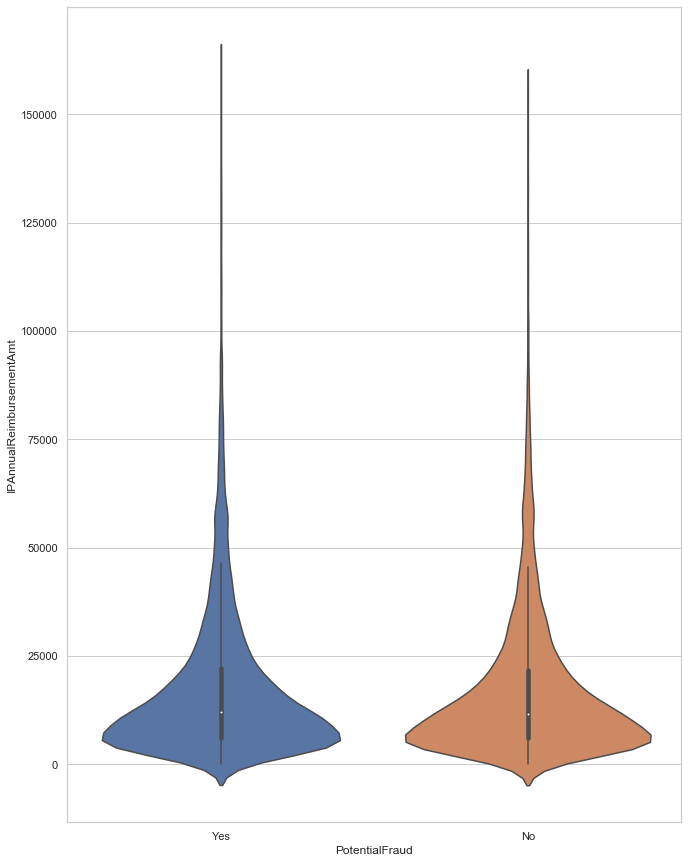

In [314]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="PotentialFraud", y="IPAnnualReimbursementAmt", data=inpatient_beneficiary_detail)

<h3>Observations</h3>
For inpatient annual reimbursed amount distribution is same.

Outpatient

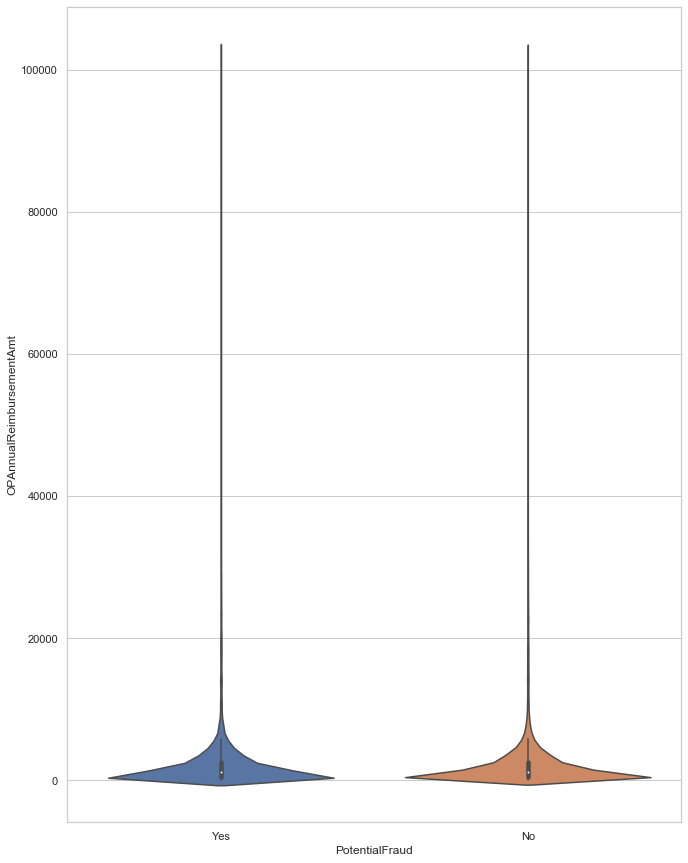

In [315]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="PotentialFraud", y="OPAnnualReimbursementAmt", data=outpatient_beneficiary_detail)

<h3>Observations</h3>
For outpatient annual reimbursed amount distribution is same.

<h3>AnnualDeductibleAmt</h3>

Inpatient

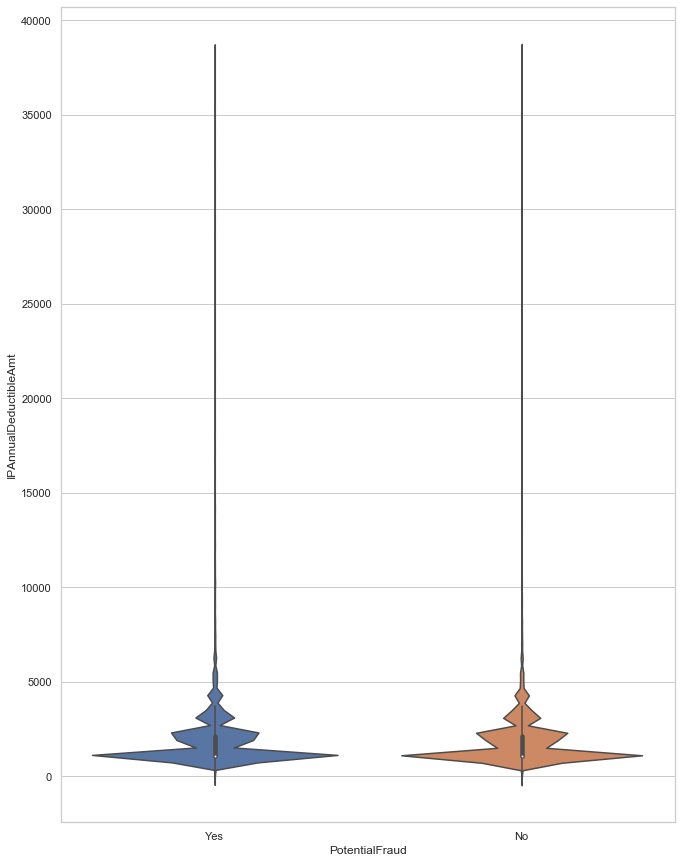

In [316]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="PotentialFraud", y="IPAnnualDeductibleAmt", data=inpatient_beneficiary_detail)

<h3>Observations</h3>
For inpatient annual deducted amount distribution is same.

Outpatient

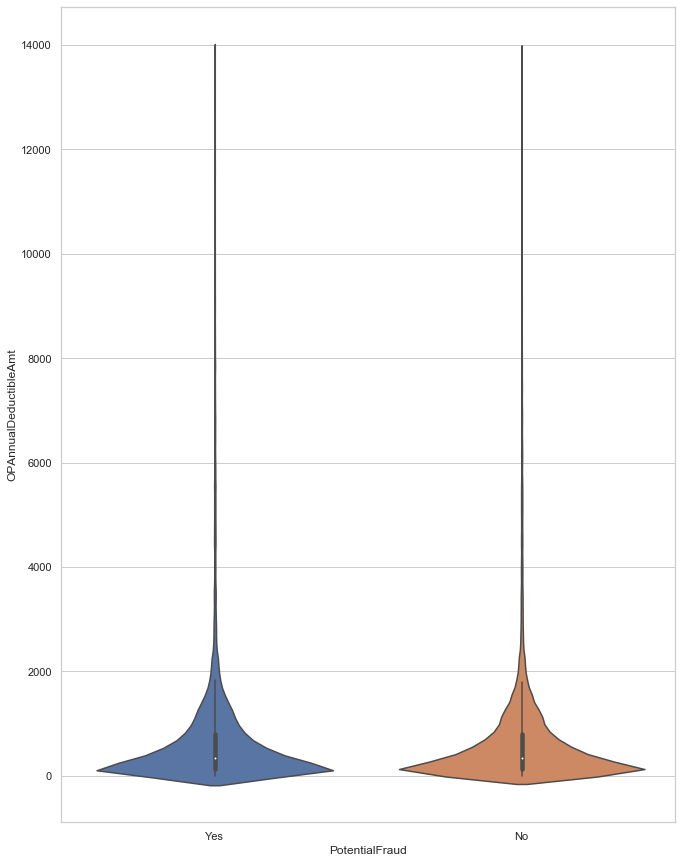

In [317]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="PotentialFraud", y="OPAnnualDeductibleAmt", data=outpatient_beneficiary_detail)

<h3>Observations</h3>
For outpatient annual deducted amount distribution is same.

<h3>Multivariate analysis</h3>

In [318]:
all_group = inpatient_provider.groupby(['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1']).size()
fraud_group = inpatient_provider[inpatient_provider['PotentialFraud'] =='Yes'].groupby(['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1']).size()

In [319]:
all_df = all_group.to_frame(name = 'count').reset_index()
fraud_df = fraud_group.to_frame(name = 'count').reset_index()
all_df = all_df.sort_values('count',ascending=False)
fraud_df = fraud_df.sort_values('count',ascending=False)

In [320]:
all_df.head()

,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,count
14570,DV5789,V5789,935
4922,D486,486,764
7050,D5990,5990,363
5049,D49121,49121,339
11398,D78650,78659,325


In [321]:
fraud_df.head()

,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,count
9788,DV5789,V5789,554
3328,D486,486,423
4778,D5990,5990,202
2564,D4280,4280,197
3420,D49121,49121,196


In [322]:
all_group = inpatient_provider.groupby(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2']).size()
fraud_group = inpatient_provider[inpatient_provider['PotentialFraud'] =='Yes'].groupby(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2']).size()

In [323]:
all_df = all_group.to_frame(name = 'count').reset_index()
fraud_df = fraud_group.to_frame(name = 'count').reset_index()
all_df = all_df.sort_values('count',ascending=False)
fraud_df = fraud_df.sort_values('count',ascending=False)

In [324]:
all_df.head(20)

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,count
12126,486,4019,83
7466,41401,4019,77
19292,71536,4019,66
25278,V5789,4019,66
7412,41401,2724,66
8348,42731,4019,56
12575,49121,4019,53
884,0389,99591,52
816,0389,5990,51
7398,41401,25000,47


In [325]:
fraud_df.head(20)

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,count
7748,486,4019,44
16101,V5789,4019,40
4667,41401,4019,38
12314,71536,4019,37
4625,41401,2724,36
8062,49121,4019,34
5266,42731,4019,33
8082,49121,4280,29
539,0389,5990,28
12283,71536,2851,28


In [326]:
all_group = inpatient_provider.groupby(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3']).size()
fraud_group = inpatient_provider[inpatient_provider['PotentialFraud'] =='Yes'].groupby(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3']).size()

In [327]:
all_df = all_group.to_frame(name = 'count').reset_index()
fraud_df = fraud_group.to_frame(name = 'count').reset_index()
all_df = all_df.sort_values('count',ascending=False)
fraud_df = fraud_df.sort_values('count',ascending=False)

In [328]:
all_df.head(20)

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,count
9667,41401,2724,4019,8
17534,486,25000,4019,7
29222,71536,2851,4019,6
11495,42731,4019,496,5
19190,49121,4019,42731,5
9660,41401,2724,25000,5
10190,41401,496,4111,5
14081,42833,4280,40390,5
29455,71536,53081,4019,5
37362,V5789,4019,5990,5


In [329]:
fraud_df.head(20)

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,count
6729,42731,4019,496,5
5619,41401,2724,25000,5
5945,41401,496,4111,5
10732,486,496,4019,4
7350,4280,25000,42731,4
8584,43310,42731,25000,4
17387,71536,V4365,4019,4
17162,71536,3659,4019,4
10286,486,25000,4019,4
16529,6826,5559,25000,4
